# Set UP Modules

In [226]:
#https://www.youtube.com/watch?v=XjCPUkYc62Q

In [237]:
import os
os.chdir('/home/tzd/fs03/d1/tzd/Data_analysis/RAworkflow')
%run ./My_Modules/DataSetUP10VAR.ipynb
#FmodelDF
# getNoASGM():       => Hg0no_ASGM dataframe; in correct units
# get_model(region): => Hg0_modified; in correct units (takes gridbox region in Peru as input)
# getLoRes():        => Hg0 baseline with ASGM low resulution in correct units
# getHiRes():        => Hg0 baseline with ASGM high resulution in correct units  
# getNoASGM():       => Hg0 baseline without ASGM low resulution in correct units  
# get_obs_d():       => obs_Hg0; original observations daily mean values
# get_detrended_obs(): => Obs_detrended; return detrended observations
# get_detrended_model(model): => This function takes in a dataframe of model outputs and returns the detrended version of that model output
# getIQR_Dd(model): This function takes in a dataframe of model outputs and returns the detrended IQR 
# getIQR(model): => This function takes in a dataframe of model outputs and returns the IQR

boxes().shape[0]
# getNoASGM():       => Hg0no_ASGM dataframe; in correct units
# get_model(region): => Hg0_modified; in correct units (takes gridbox region in Peru as input)
# getLoRes():        => Hg0 baseline with ASGM low resulution in correct units
# getHiRes():        => Hg0 baseline with ASGM high resulution in correct units
# getNoASGM():       => Hg0 baseline without ASGM low resulution in correct units
# get_obs_d():       => obs_Hg0; original observations daily mean values
# get_detrended_obs(): => Obs_detrended; return detrended observations
# get_detrended_model(model): => This function takes in a dataframe of model outputs 
                                and returns the detrended version of that model output
# getObsIQR(obs): This function takes observations and returns the IQR 
# getIQR_Dd(model): This function takes in a dataframe of model outputs and returns the detrended IQR
# getIQR(model): => This function takes in a dataframe of model outputs and returns the IQR
#

In [272]:

from matplotlib.ticker import ScalarFormatter,AutoMinorLocator
import matplotlib as mpl
# Plot settings
# Plot settings
plt.style.use(
    "https://github.com/aeturrell/coding-for-economists/raw/main/plot_style.txt"
)
mpl.rcParams.update({"lines.linewidth": 1.2})
# Set max rows displayed for readability
pd.set_option("display.max_rows", 8)
import warnings
warnings.filterwarnings("ignore")
from statsmodels.tsa.seasonal import seasonal_decompose

# Characteristics Time Series

## Characteristics of Observation Time Series

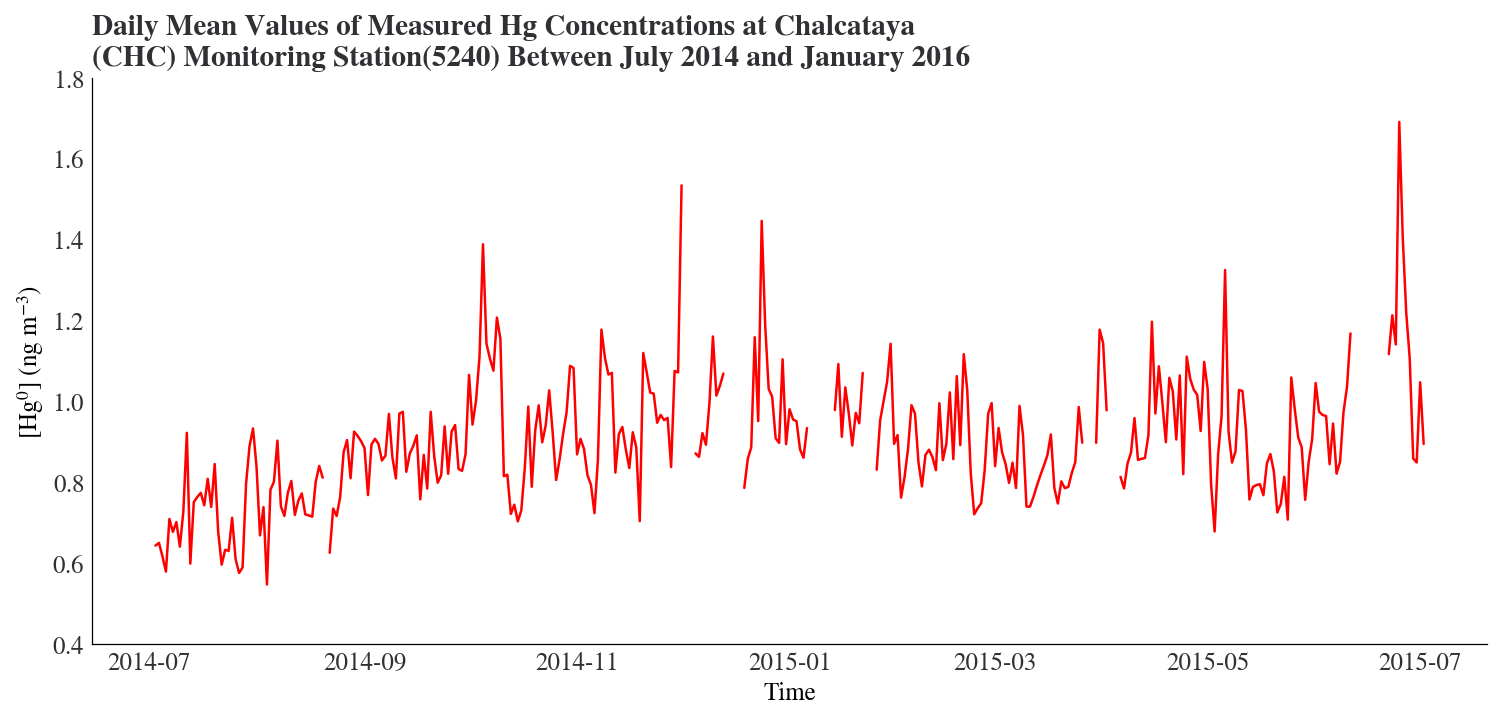

In [240]:
fig= plt.figure( figsize=[12,5])
ax= fig.add_subplot(111)
Title='Daily Mean Values of Measured Hg Concentrations at Chalcataya \n(CHC) Monitoring Station(5240) Between July 2014 and January 2016'
Y_label='[Hg$^0$] (ng m$^{-3}$)'
X_label= 'Time'
plt_data=get_obs_d().value

ax.plot(plt_data,color = 'red',label = 'Observations')
ax.set_title(Title, size=14,fontweight="bold")
plt.ylabel(Y_label)
plt.xlabel(X_label)
# plt.legend()
plt.show()

A.M. Koenig et al. assert that the last 9 months of the measurement period was affected by ENSO hence 

In [242]:
#observations under normal conditions
obs_nc=get_obs_d()[:'2015-07-03']

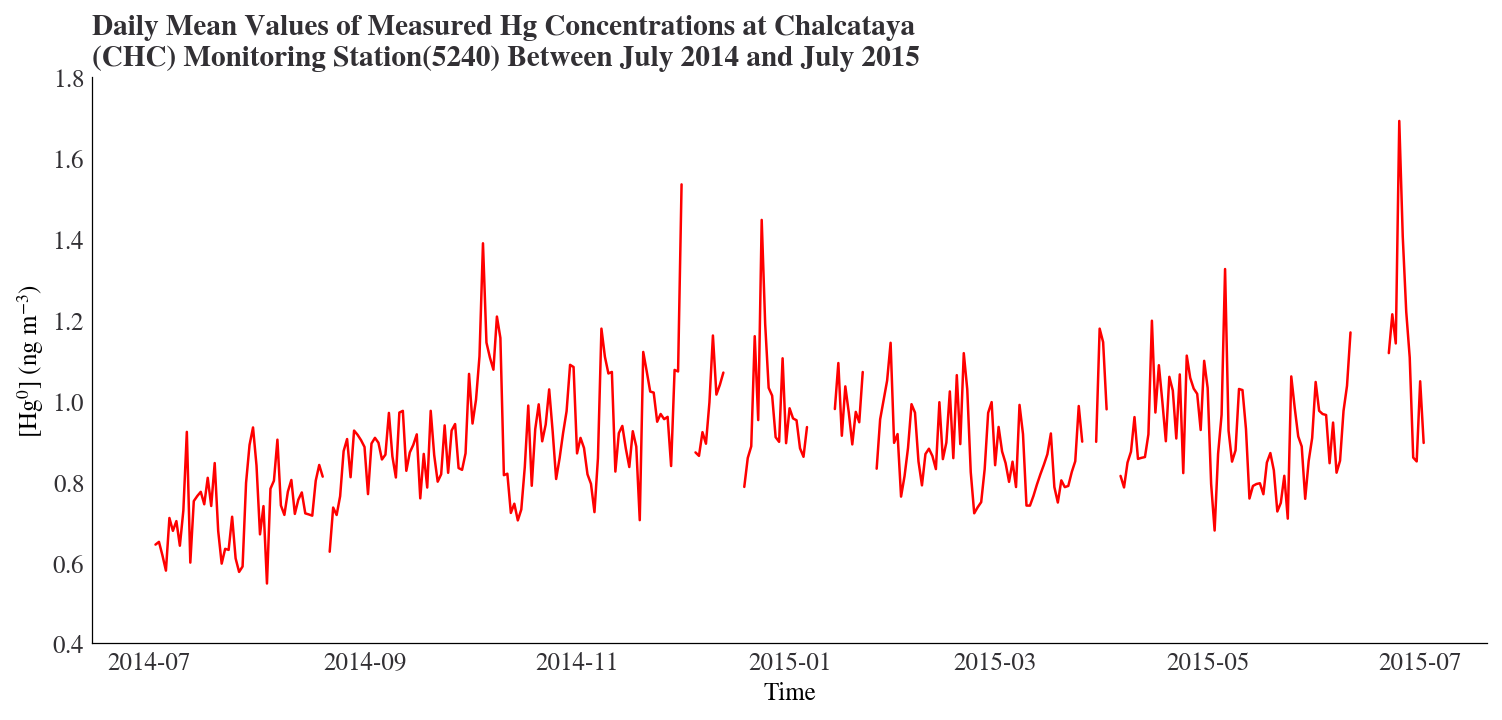

In [243]:
fig= plt.figure( figsize=[12,5])
ax= fig.add_subplot(111)
Title='Daily Mean Values of Measured Hg Concentrations at Chalcataya \n(CHC) Monitoring Station(5240) Between July 2014 and July 2015'
Y_label='[Hg$^0$] (ng m$^{-3}$)'
X_label= 'Time'
plt_data=obs_nc.value

ax.plot(plt_data,color = 'red',label = 'Observations')
ax.set_title(Title, size=14,fontweight="bold")
plt.ylabel(Y_label)
plt.xlabel(X_label)
# plt.legend()
plt.show()

Based on the trend plot in the figure above, there appears to be an overall upwards trend in the observed mercury concentration over the two years in which the data was recorded

We can see that there is definite seasonality in the data, causing prices to fluctuate by 0.2 over the course of a month.

The residual plot show us that there is randomness in the observed concentration of Hg in the atmosphere

Next we weill create the same plot for the model output tio figure out if GEOS Chem captures all these characteristic of the observed data


## Characteristics of Model Time Series

In [244]:
GCno_asgm=getNoASGM()[:'2015-07-03']
GC_asgm=getLoRes()[:'2015-07-03']

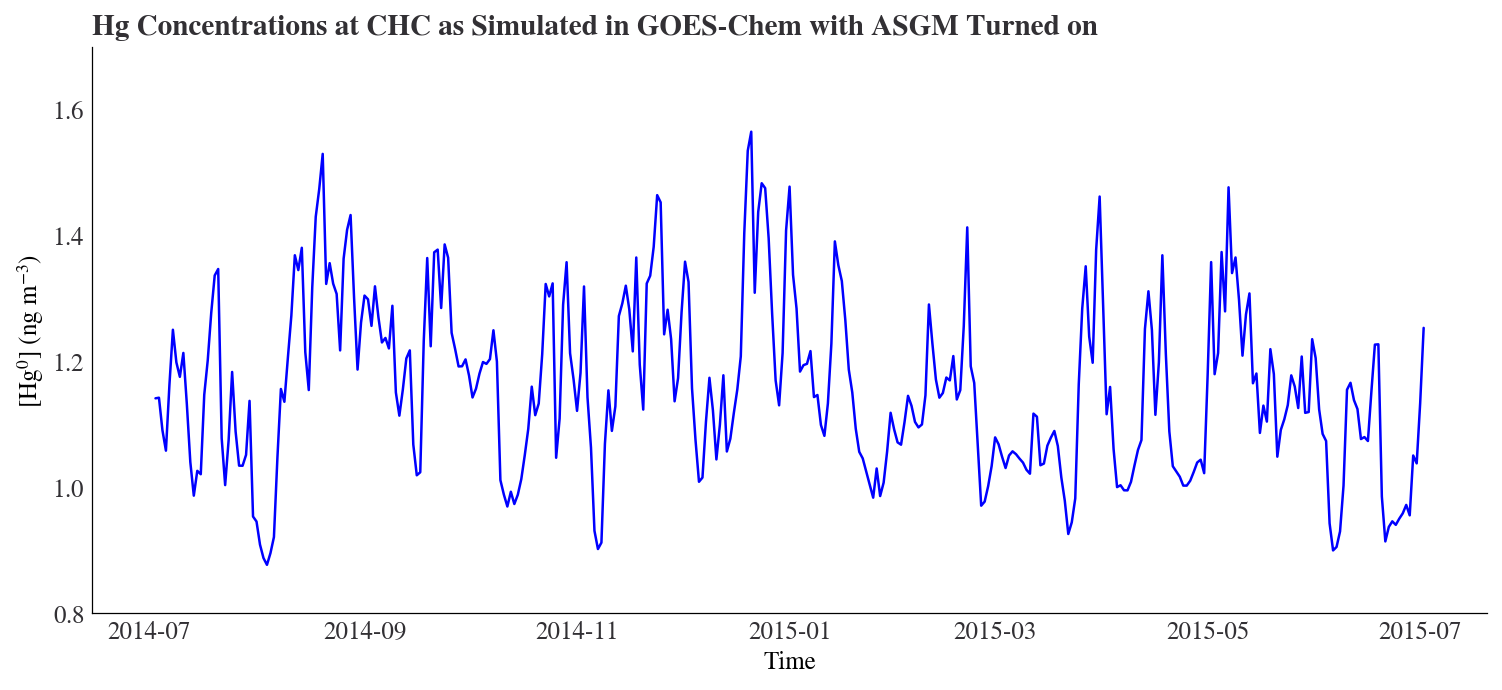

In [245]:
fig= plt.figure( figsize=[12,5])
ax= fig.add_subplot(111)
Title='Hg Concentrations at CHC as Simulated in GOES-Chem with ASGM Turned on'
Y_label='[Hg$^0$] (ng m$^{-3}$)'
X_label= 'Time'
plt_data=GC_asgm.SpeciesConc_Hg0

ax.plot(plt_data,color = 'blue',label = 'Reference Simulation \nwith ASGM Turned on')
ax.set_title(Title, size=14,fontweight="bold")
plt.ylabel(Y_label)
plt.xlabel(X_label)
#plt.legend()
plt.show()

Based on the trend plot in the figure above, there appears to be no overall upwards or downward trend in the modelled mercury concentration over the two years simulated in GEOS Chem

We can see that there is definite seasonality in the data, causing prices to fluctuate by 0.125 over the course of a month.

The residual plot shows us that there is randomness in the modelled concentration of Hg in the atmosphere

Next we weill create the same plot for the model output tio figure out if GEOS Chem captures all these characteristic of the observed data

# Comparison of Time Series

## Plot of time series before detrending 

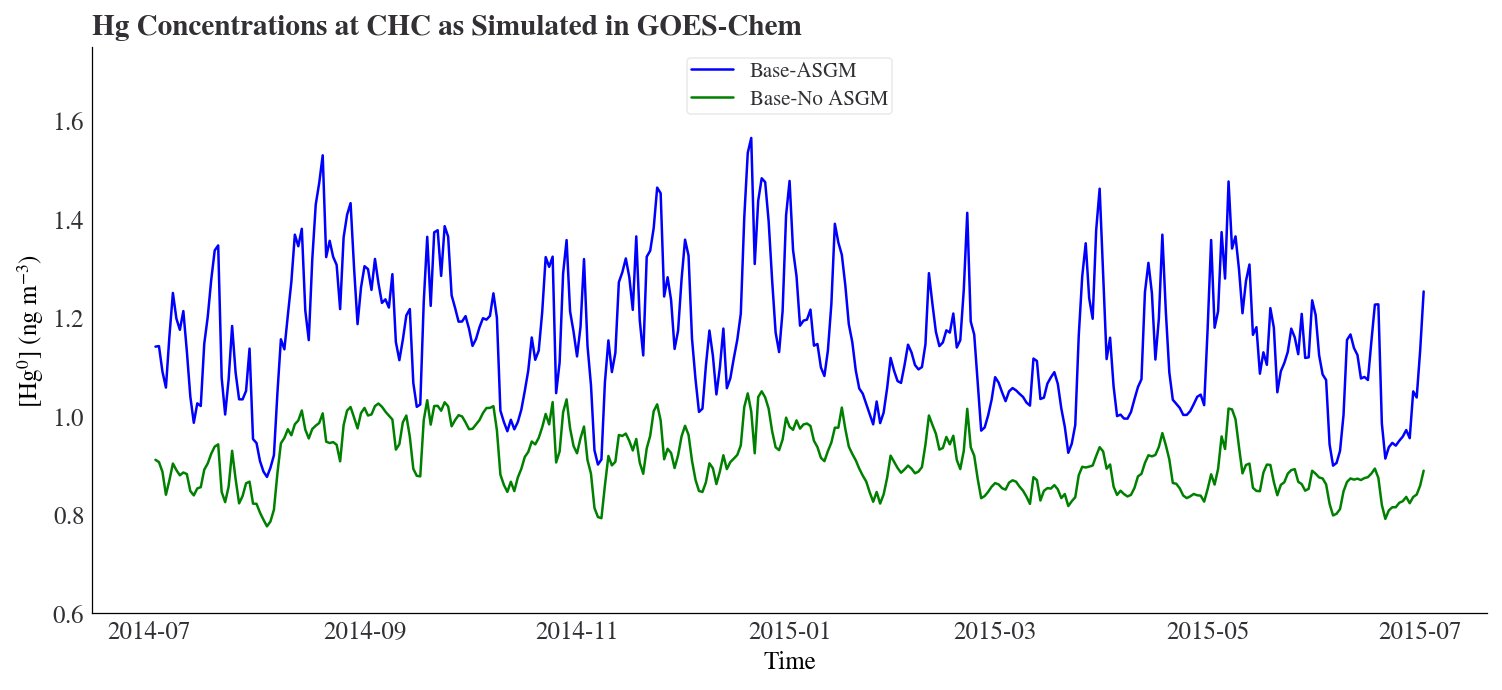

In [246]:
#Set Up figure
fig= plt.figure( figsize=[12,5])
ax= fig.add_subplot(111)

#define labels
Title='Hg Concentrations at CHC as Simulated in GOES-Chem'
Y_label='[Hg$^0$] (ng m$^{-3}$)'
X_label= 'Time'

#define data
plt_data1=GCno_asgm.SpeciesConc_Hg0
plt_data2=GC_asgm.SpeciesConc_Hg0

#Plots
ax.plot(plt_data2,color = 'blue',label = 'Base-ASGM')
ax.plot(plt_data1,color = 'green',label = 'Base-No ASGM')
#Turn on labels 
ax.set_title(Title, size=14,fontweight="bold")
plt.ylabel(Y_label)
plt.xlabel(X_label)
plt.legend(loc=9)
plt.ylim(0.6, 1.75)
plt.show()
#fig.savefig('MCMC_Refactored_Notebooks/MIT_TPP_thesis/figures/ModelvsObs/GC_base_ASGMvNoASGM.png')
#fs03/d1/tzd/Data_analysis/RAworkflow/MCMC_Refactored_Notebooks/MIT_TPP_thesis/figures/ModelvsObs/ModelvsObs_v1.png

In [247]:
# #Set Up figure
# fig= plt.figure( figsize=[12,5])
# ax= fig.add_subplot(111)

# #define labels
# Title='Hg Concentrations at CHC as Simulated in GOES-Chem'
# Y_label='[Hg$^0$] (ng m$^{-3}$)'
# X_label= 'Time'

# #define data
# plt_data1=GCno_asgm.SpeciesConc_Hg0
# plt_data2=obs.value
# #Plots
# ax.plot(plt_data2,color = 'red',label = 'Observations')
# ax.plot(plt_data1,color = 'green',label = 'Base No ASGM')
# #Turn on labels 
# ax.set_title(Title, size=14,fontweight="bold")
# plt.ylabel(Y_label)
# plt.xlabel(X_label)
# plt.legend(loc=9)
# plt.ylim(0.6, 1.75)
# plt.show()
# #fig.savefig('MCMC_Refactored_Notebooks/MIT_TPP_thesis/figures/ModelvsObs/GC_base_ObsvNoASGMv1.png')

According to the plot above we can tell that GEOS-Chem attributes the Hg concentration at Chalcataya to ASGM emissions.

Consequently, we can conclude that the model asserts that the Hg concentration in the atmosphere at Chalcataya is mostly due to Hg emissions from ASGM activities in the surrounding reagion. if we trust the GEOS-Chem models prediction of the Hg concentrations, we may use it to explaint he observed concentrations in the atmosphere. 

## How do the observed concentrations in the Atmosphere compare with the modeled Hg concentrations

In [249]:
obsNC=obs_nc
GC_asgmNC=GC_asgm

### Comparison of Montlhy means

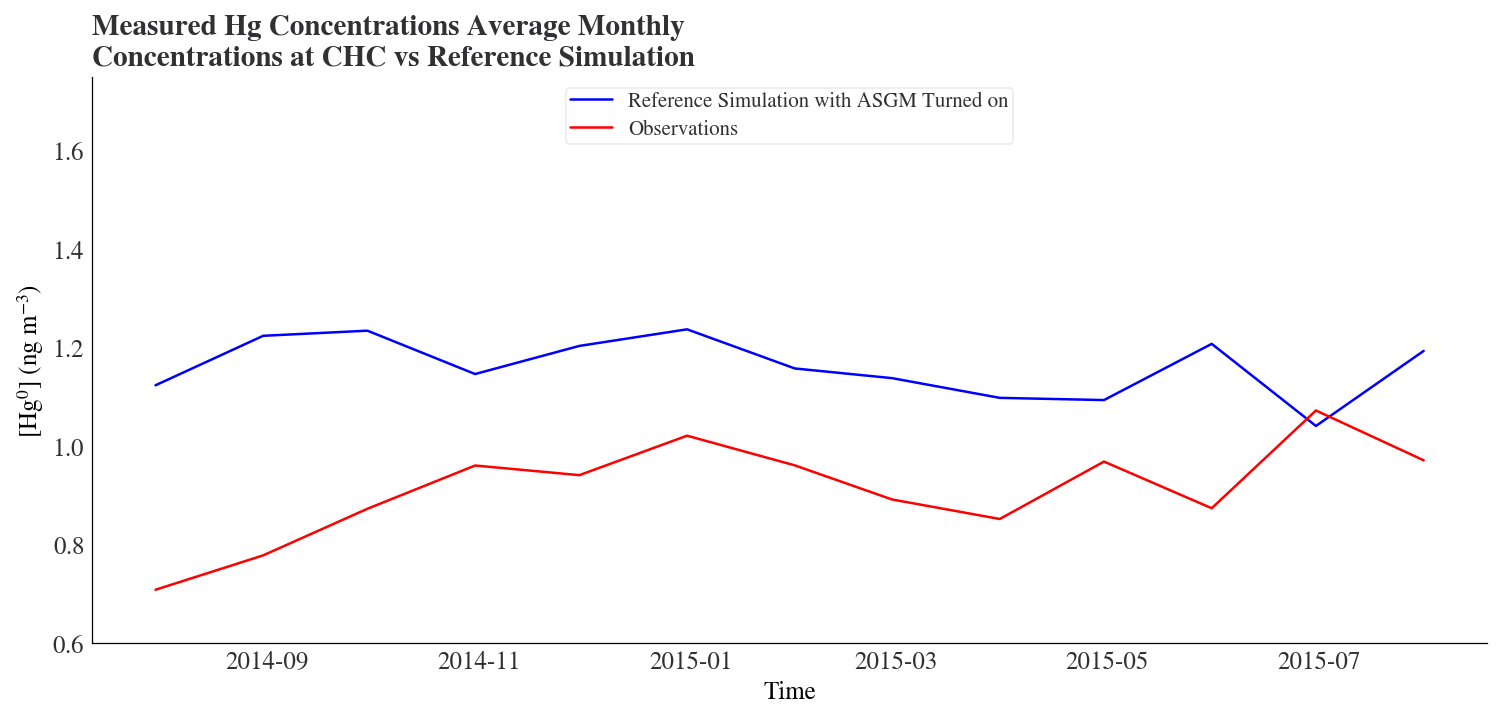

In [250]:
#Set Up figure
fig= plt.figure( figsize=[12,5])
ax= fig.add_subplot(111)

#define labels
Title='Measured Hg Concentrations Average Monthly \nConcentrations at CHC vs Reference Simulation'
Y_label='[Hg$^0$] (ng m$^{-3}$)'
X_label= 'Time'

#define data
plt_data1=obsNC.resample('M').mean()['value']
plt_data2=GC_asgmNC.resample('M').mean()['SpeciesConc_Hg0']

#Plots
ax.plot(plt_data2,color = 'blue',label = 'Reference Simulation with ASGM Turned on')
ax.plot(plt_data1,color = 'red',label = 'Observations')
#Turn on labels 
ax.set_title(Title, size=14,fontweight="bold")
plt.ylabel(Y_label)
plt.xlabel(X_label)
plt.legend(loc=9)
plt.ylim(0.6, 1.75)
plt.show()

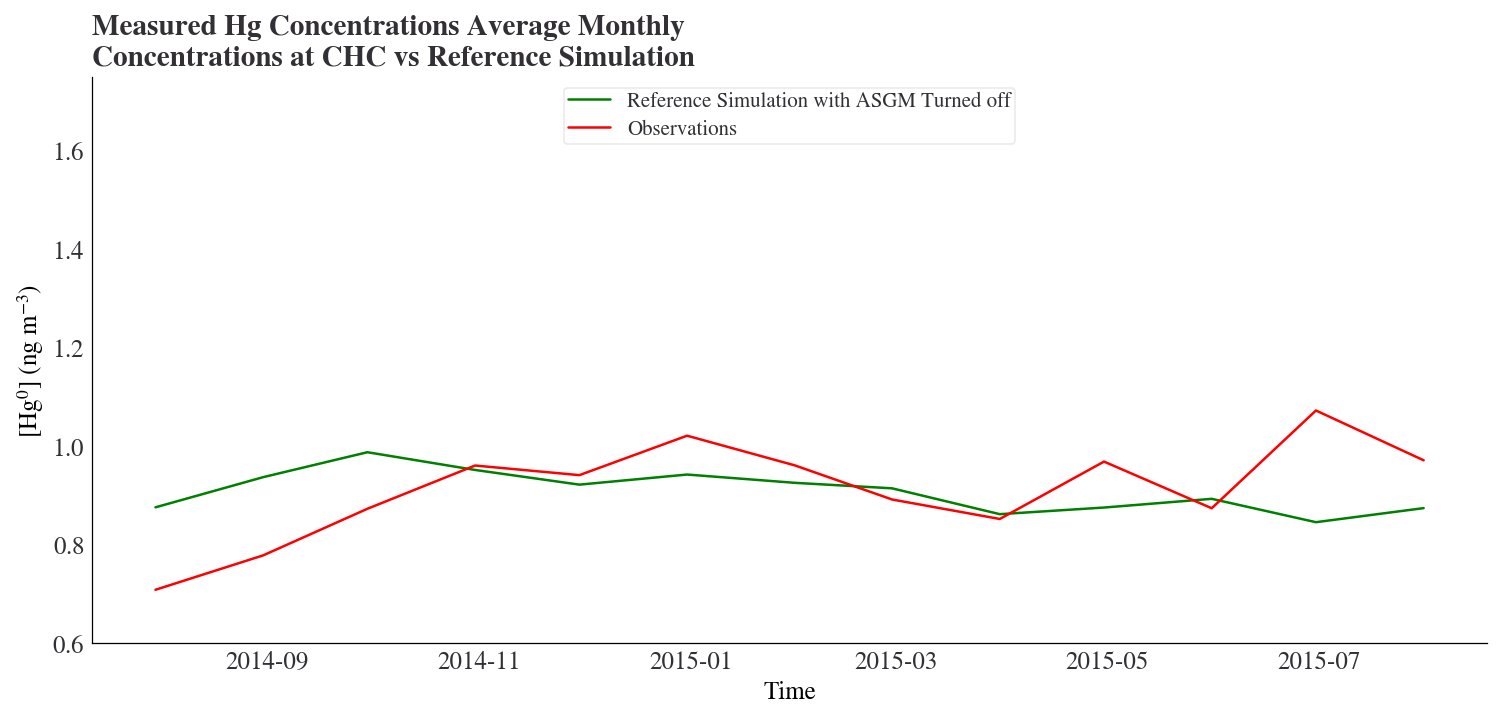

In [251]:
#Set Up figure
fig= plt.figure( figsize=[12,5])
ax= fig.add_subplot(111)

#define labels
Title='Measured Hg Concentrations Average Monthly \nConcentrations at CHC vs Reference Simulation'
Y_label='[Hg$^0$] (ng m$^{-3}$)'
X_label= 'Time'

#define data
plt_data1=obsNC.resample('M').mean()['value']
plt_data2=GCno_asgm.resample('M').mean()['SpeciesConc_Hg0']

#Plots
ax.plot(plt_data2,color = 'green',label = 'Reference Simulation with ASGM Turned off')
ax.plot(plt_data1,color = 'red',label = 'Observations')
#Turn on labels 
ax.set_title(Title, size=14,fontweight="bold")
plt.ylabel(Y_label)
plt.xlabel(X_label)
plt.legend(loc=9)
plt.ylim(0.6, 1.75)
plt.show()

# Further Comparison of Time series

NameError: name 'obs' is not defined

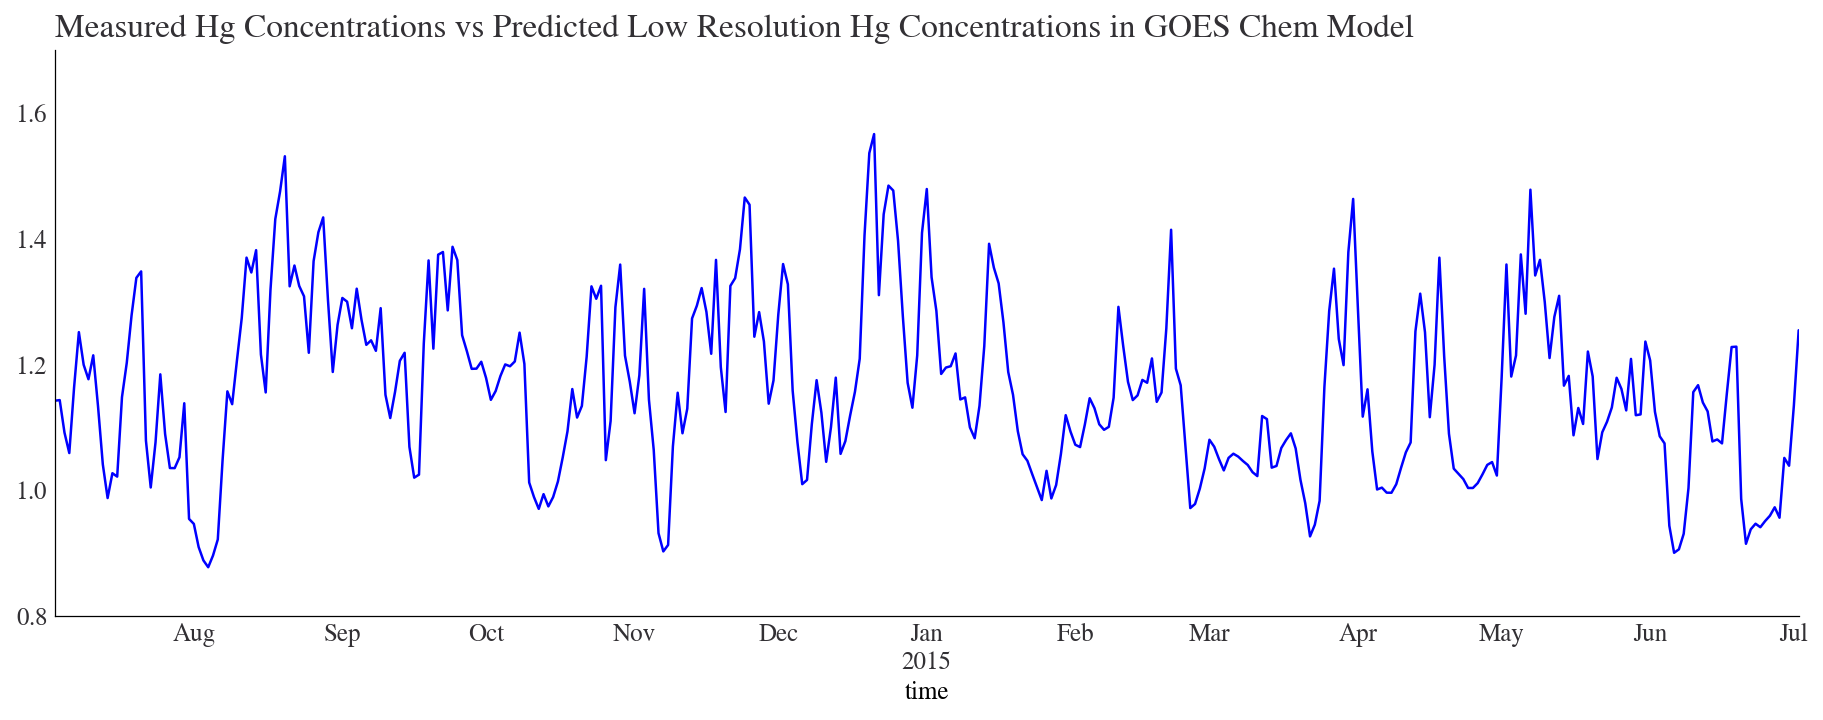

In [273]:
plt.figure(figsize=(15,5))
plt.title('Measured Hg Concentrations vs Predicted Low Resolution Hg Concentrations in GOES Chem Model')
GC_asgm.SpeciesConc_Hg0.plot(color = 'blue',label = 'Reference Simulation with ASGM Emissions ')
obs.value.plot(color = 'red',label = 'Observations')
plt.legend()
plt.ylabel('[Hg$^0$] (ng m$^{-3}$)')
plt.xlabel('Time')
plt.show()

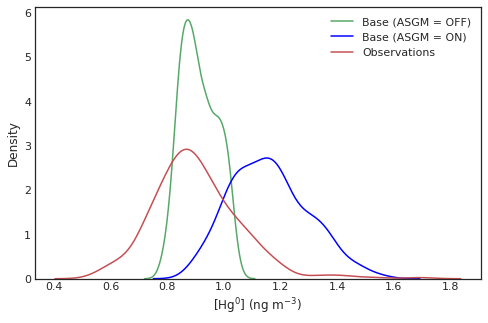

In [ ]:
#GCno_asgm
fig, ax =plt.subplots(figsize=(8,5))
#plt.title('Histograms of Predicted Hg Concentrations in \nGEOS-Chem vs Observed Concentration',size=12,fontweight="bold")

sns.kdeplot(data=GCno_asgm.SpeciesConc_Hg0,ax =ax, fill=False,color = 'g',label = 'Base (ASGM = OFF)')
sns.kdeplot(data=GC_asgmNC.SpeciesConc_Hg0,ax =ax, fill=False,color = 'blue',label = 'Base (ASGM = ON)')
sns.kdeplot(data=obsNC.value,ax =ax, fill=False,color = 'r',label = 'Observations')
plt.legend()
plt.xlabel('[Hg$^0$] (ng m$^{-3}$)')
name='Histplot_obsVmodel_v1'
savepath='/home/tzd/fs03/d1/tzd/Data_analysis/MIT_TPP_thesis/figures/ModelvsObs/'+name+'.pdf'
fig.savefig(savepath,bbox_inches='tight')
plt.show()

## Set up defining variables

In [284]:
df_columns=['Base (ASGM = OFF)','Base (ASGM = ON)','Observations']
plot_colors={'Base (ASGM = ON)':'b','Base (ASGM = OFF)':'#329932','Observations':'#ff6961'}
df_normal_conditions=pd.DataFrame(columns=df_columns)
df_normal_conditions['Base (ASGM = OFF)']=GCno_asgm.SpeciesConc_Hg0
df_normal_conditions['Base (ASGM = ON)']=GC_asgmNC.SpeciesConc_Hg0
df_normal_conditions['Observations']=obsNC.value
df_normal_conditions

,Base (ASGM = OFF),Base (ASGM = ON),Observations
time,,,
2014-07-03,0.911956,1.141870,0.644308
2014-07-04,0.907401,1.142869,0.651114
2014-07-05,0.887611,1.091087,0.617688
2014-07-06,0.841053,1.058690,0.579989
...,...,...,...
2015-06-29,0.836476,1.050984,0.859547
2015-06-30,0.841379,1.038522,0.849968
2015-07-01,0.859729,1.134310,1.048141
2015-07-02,0.889885,1.253862,0.895688


In [269]:

colourWheel =['#329932',
            '#ff6961',
            'b',
            '#6a3d9a',
            '#fb9a99',
            '#e31a1c',
            '#fdbf6f',
            '#ff7f00',
            '#cab2d6',
            '#6a3d9a',
            '#ffff99',
            '#b15928',
            '#67001f',
            '#b2182b',
            '#d6604d',
            '#f4a582',
            '#fddbc7',
            '#f7f7f7',
            '#d1e5f0',
            '#92c5de',
            '#4393c3',
            '#2166ac',
            '#053061']
dashesStyles = [[3,1],
            [1000,1],
            [2,1,10,1],
            [4, 1, 1, 1, 1, 1]]

## Create Density Plot

### Set up function for plotting density plots

In [270]:
def density_plot_compare(df,file_name,file_directory):
    plt.style.use('/home/tzd/fs03/d1/tzd/Data_analysis/MIT_TPP_thesis/JPnotebooks/plot_style.txt')
    plt.close('all')
    fig, ax = plt.subplots()
    for j,series in enumerate(df.columns):

        alphaVal = 0.6
        linethick = 3.5
        sns.kdeplot(df[series],ax=ax,color=plot_colors[series],label=series,alpha=alphaVal,linewidth=linethick)
                
    ax.set_xlabel('Hg$^0$ (ng m$^{-3}$)')
    ax.yaxis.set_major_formatter(ScalarFormatter())
    ax.yaxis.major.formatter._useMathText = True
    ax.yaxis.set_minor_locator(  AutoMinorLocator(5))
    ax.xaxis.set_minor_locator(  AutoMinorLocator(5))
    #ax.yaxis.set_label_coords(0.63,1.01)
    ax.yaxis.tick_left()
    #nameOfPlot = 'Histograms of Predicted Hg Concentrations in \nGEOS-Chem vs Observed Concentration'
    plt.ylabel('Density',rotation=90)
    ax.legend(frameon=False, loc='upper left',ncol=2,handlelength=4)
    # plt.savefig(,dpi=300)
    savepath=file_directory+file_name
    fig.savefig(savepath,bbox_inches='tight')
    plt.show()

In [256]:
from datetime import date
  
  
# Returns the current local date
today = date.today()
print("Today date is: ", today)

Today date is:  2022-07-13


### Plot Non-Standar Density Plot

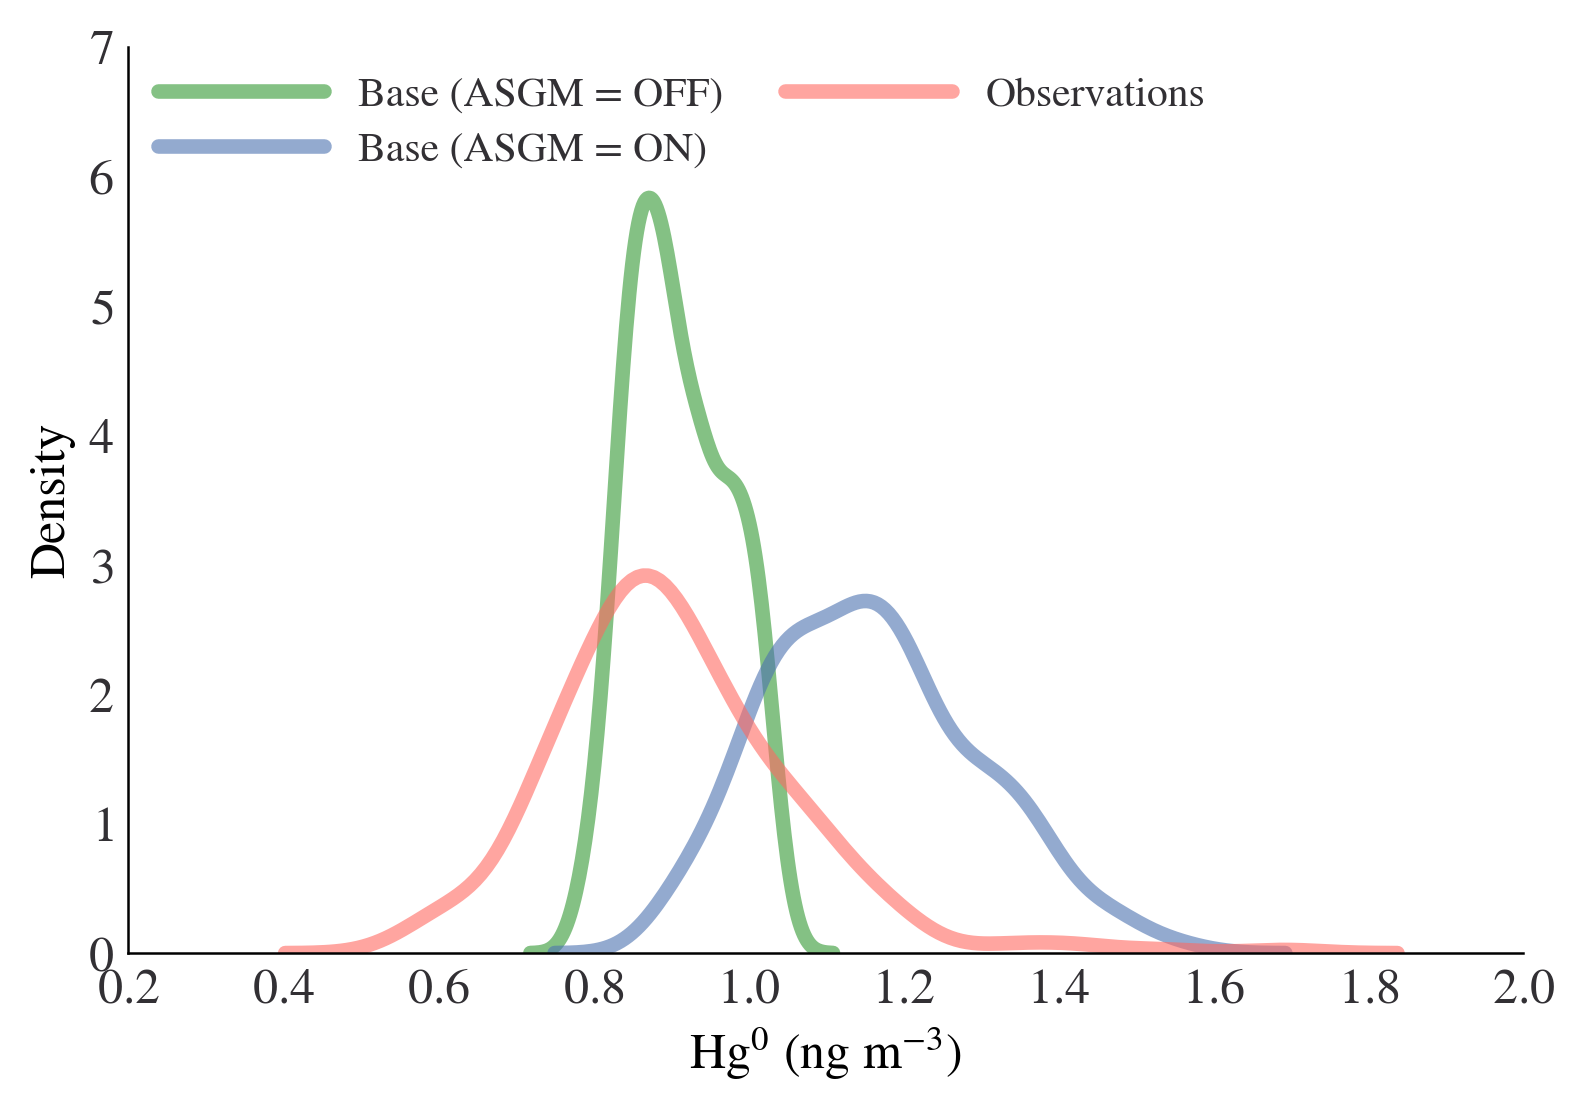

In [285]:
file_directory = '/home/tzd/fs03/d1/tzd/Data_analysis/MIT_TPP_thesis/figures/ModelvsObs/'
file_name = '06-12-22_models_vs_observations_density-plot.pdf'
density_plot_compare(df_normal_conditions,file_name,file_directory)

# Standardize

In [286]:
df_nc_standardized =(df_normal_conditions-df_normal_conditions.mean())
df_nc_standardized.head(3)

,Base (ASGM = OFF),Base (ASGM = ON),Observations
time,,,
2014-07-03,0.000313,-0.018322,-0.257694
2014-07-04,-0.004243,-0.017323,-0.250888
2014-07-05,-0.024033,-0.069105,-0.284314


### Plot Standardized densityplot

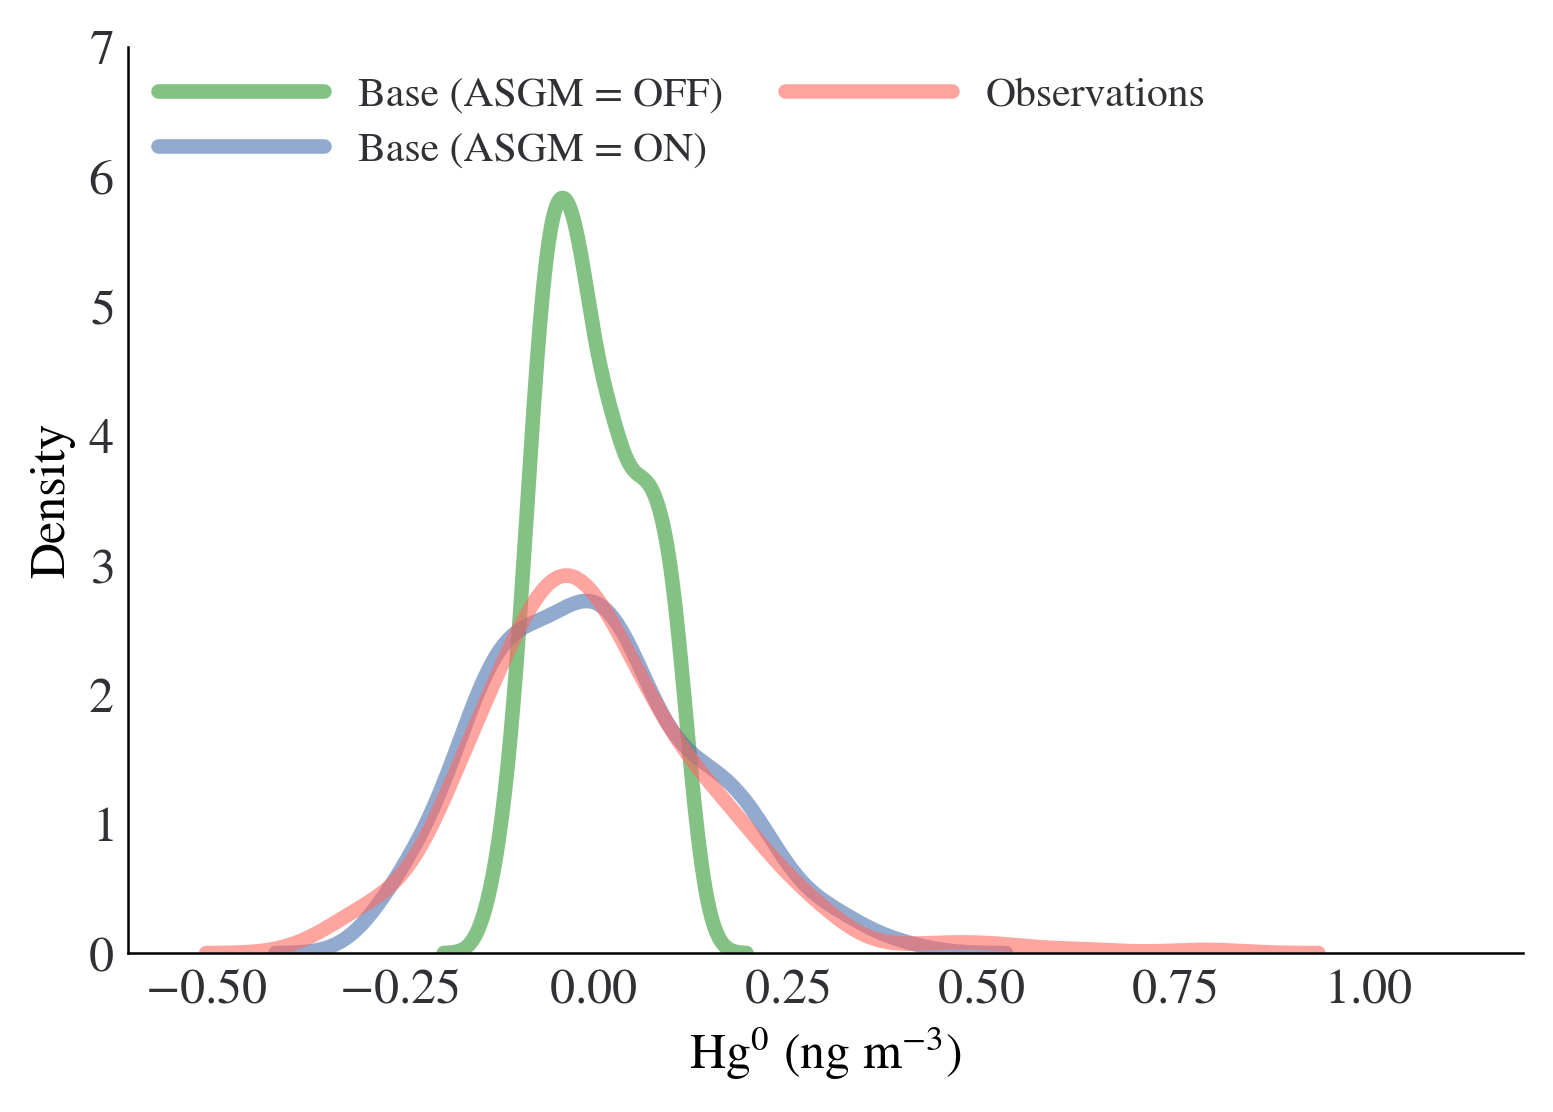

In [287]:
file_directory = '/home/tzd/fs03/d1/tzd/Data_analysis/MIT_TPP_thesis/figures/ModelvsObs/'
file_name = '06-12-22_models_vs_observations_density-plot_std.pdf'
density_plot_compare(df_nc_standardized,file_name,file_directory)

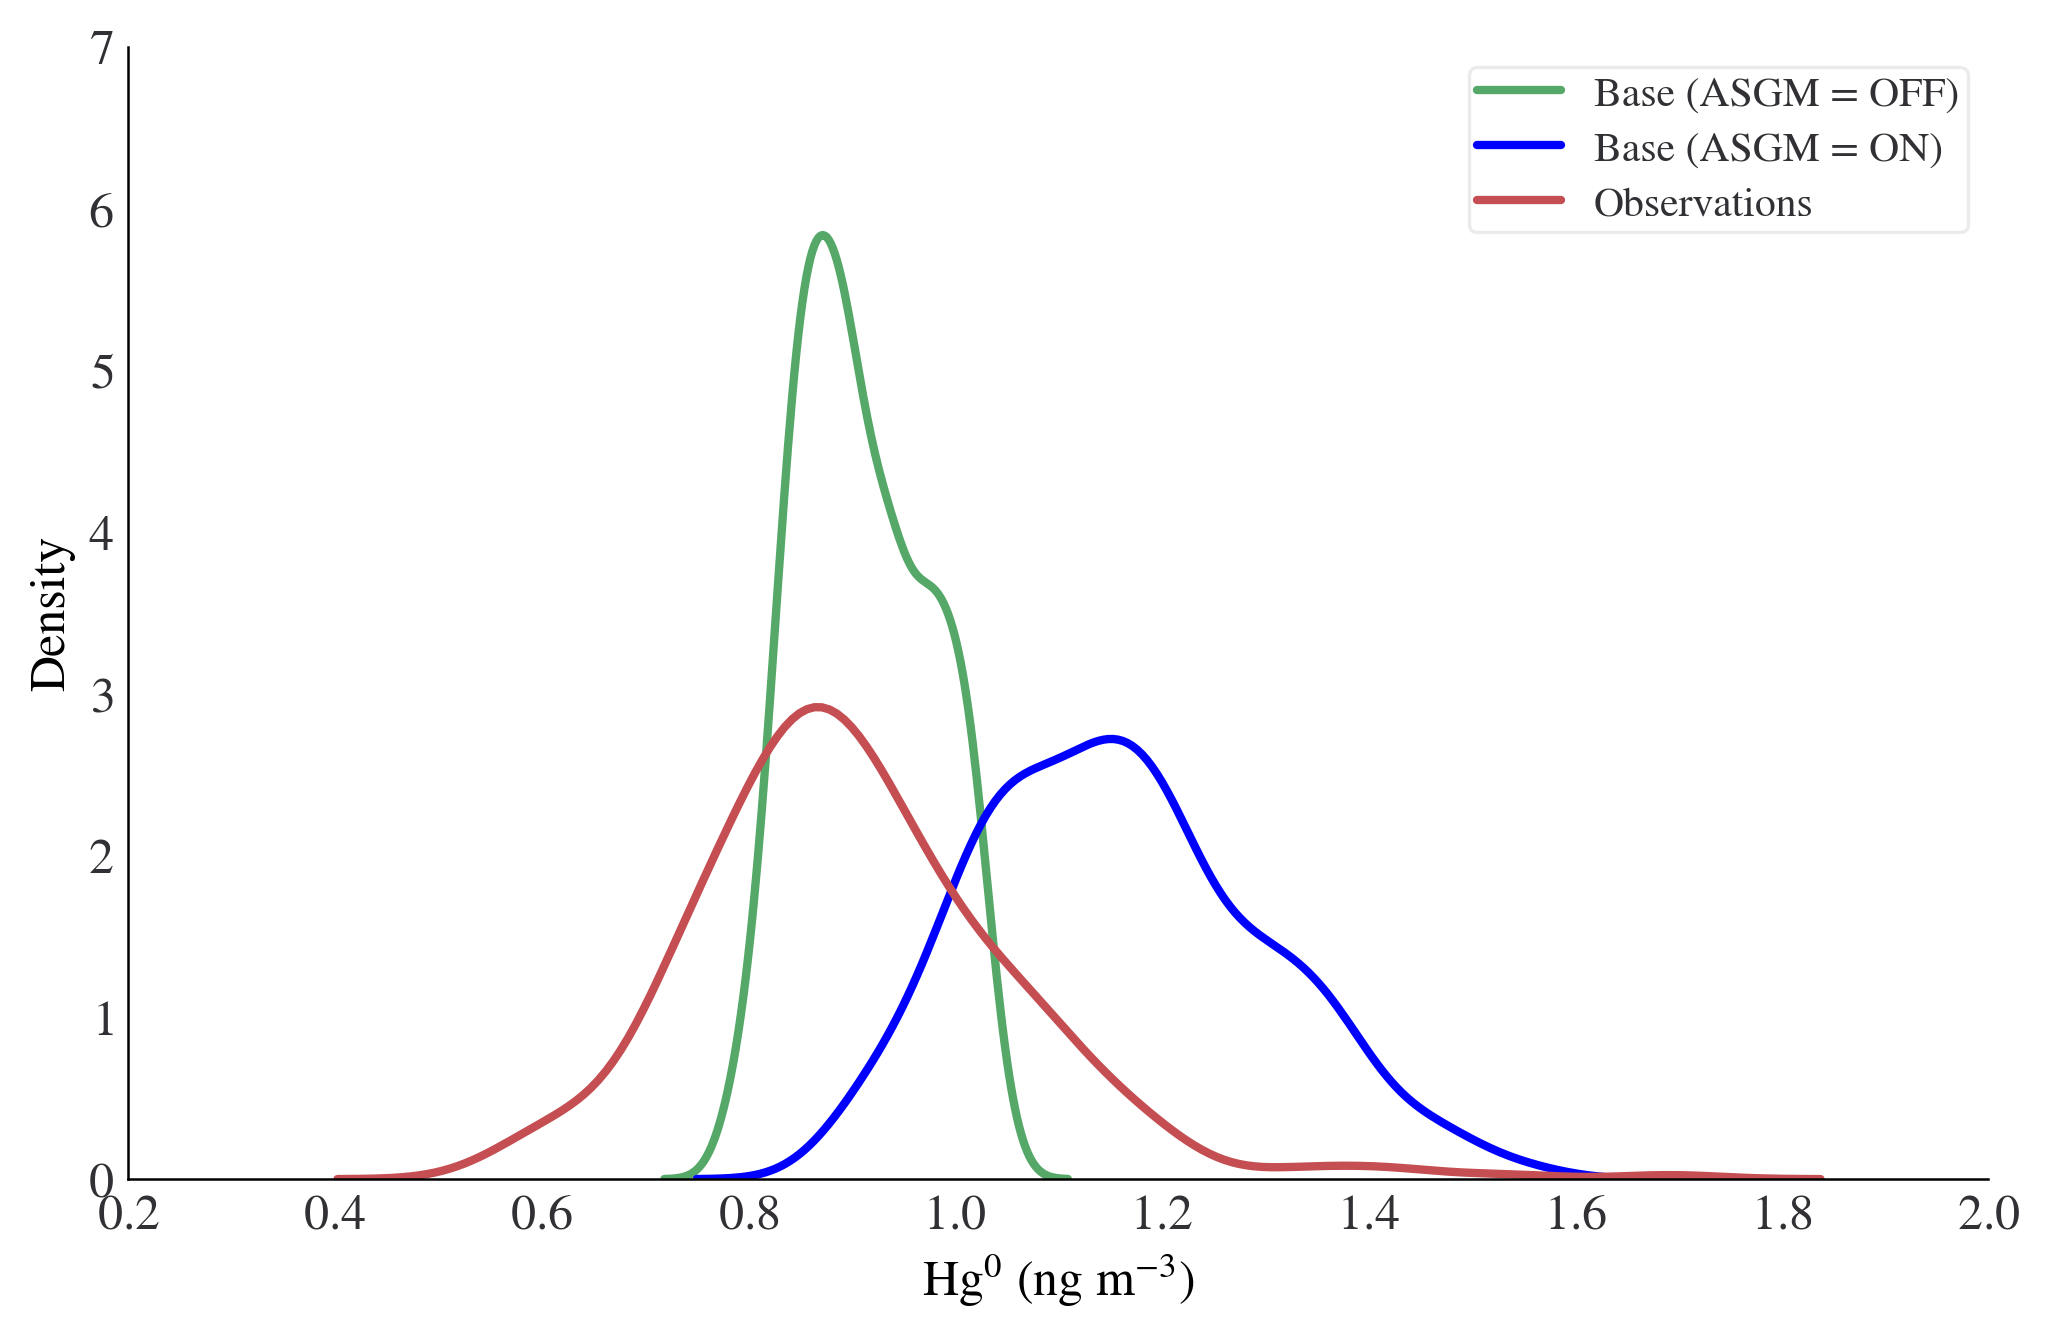

In [276]:

from matplotlib.ticker import ScalarFormatter,AutoMinorLocator
import matplotlib as mpl
fig, ax =plt.subplots(figsize=(8,5))
plt.style.use('/home/tzd/fs03/d1/tzd/Data_analysis/MIT_TPP_thesis/JPnotebooks/plot_style.txt')
#plt.title('Histograms of Predicted Hg Concentrations in \nGEOS-Chem vs Observed Concentration',size=12,fontweight="bold")

sns.kdeplot(data=GCno_asgm.SpeciesConc_Hg0,ax =ax, fill=False,color = 'g',label = 'Base (ASGM = OFF)')
sns.kdeplot(data=GC_asgmNC.SpeciesConc_Hg0,ax =ax, fill=False,color = 'blue',label = 'Base (ASGM = ON)')
sns.kdeplot(data=obsNC.value,ax =ax, fill=False,color = 'r',label = 'Observations')
plt.legend()
plt.xlabel('Hg$^0$ (ng m$^{-3}$)')
name='Histplot_obsVmodel_v1'
savepath='/home/tzd/fs03/d1/tzd/Data_analysis/MIT_TPP_thesis/figures/ModelvsObs/'+name+'.pdf'
fig.savefig(savepath,bbox_inches='tight')
plt.show()

## depreciated plots

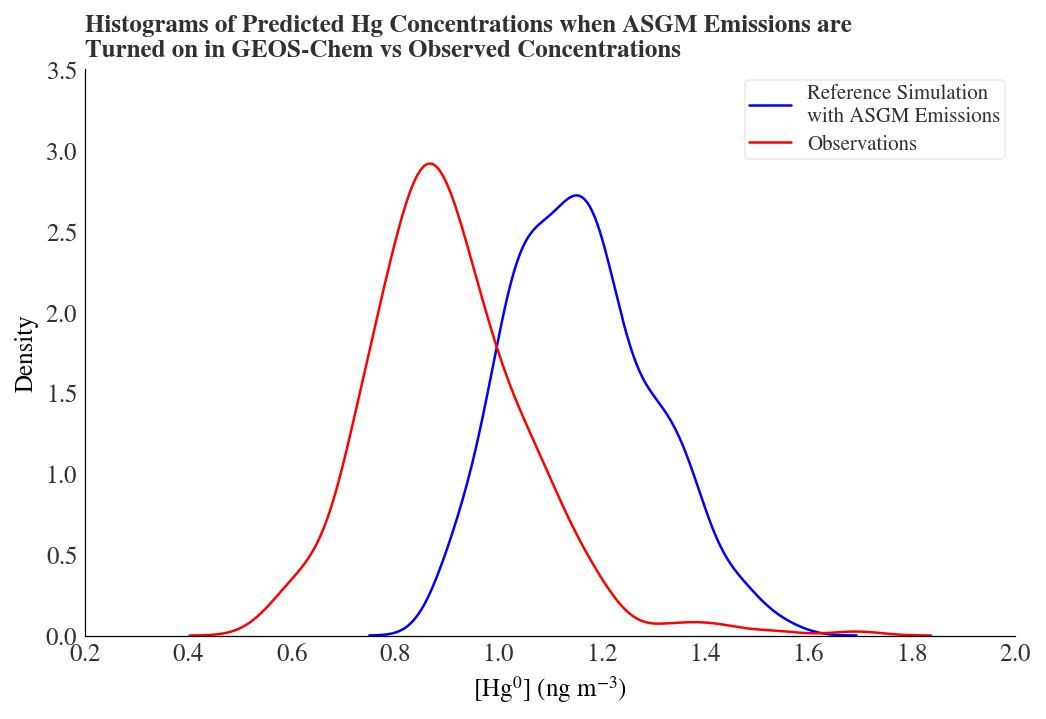

In [258]:
#GCno_asgm
plt.figure(figsize=(8,5))
plt.title('Histograms of Predicted Hg Concentrations when ASGM Emissions are \nTurned on in GEOS-Chem vs Observed Concentrations',size=12,fontweight="bold")
sns.kdeplot(data=GC_asgmNC.SpeciesConc_Hg0, fill=False,color = 'blue',label = 'Reference Simulation \nwith ASGM Emissions')#,bw_adjust=0.5)
sns.kdeplot(data=obsNC.value, fill=False,color = 'red',label = 'Observations')#,bw_adjust=0.5)
#sns.kdeplot(data=GCno_asgm.SpeciesConc_Hg0, fill=False,color = 'g',label = 'Reference Simulation \nwith no ASGM Emissions',bw_adjust=0.5)
plt.legend()
plt.xlabel('[Hg$^0$] (ng m$^{-3}$)')
plt.show()

In [259]:
df_comb_mod=pd.merge(GCno_asgm,GC_asgmNC,  left_index=True, right_index=True)
df_comb=pd.merge(df_comb_mod, obsNC, left_index=True, right_index=True)
df_comb.columns=['Base (ASGM = OFF)','Base (ASGM = ON)','Observations']
df_comb

,Base (ASGM = OFF),Base (ASGM = ON),Observations
time,,,
2014-07-03,0.911956,1.141870,0.644308
2014-07-04,0.907401,1.142869,0.651114
2014-07-05,0.887611,1.091087,0.617688
2014-07-06,0.841053,1.058690,0.579989
...,...,...,...
2015-06-29,0.836476,1.050984,0.859547
2015-06-30,0.841379,1.038522,0.849968
2015-07-01,0.859729,1.134310,1.048141
2015-07-02,0.889885,1.253862,0.895688


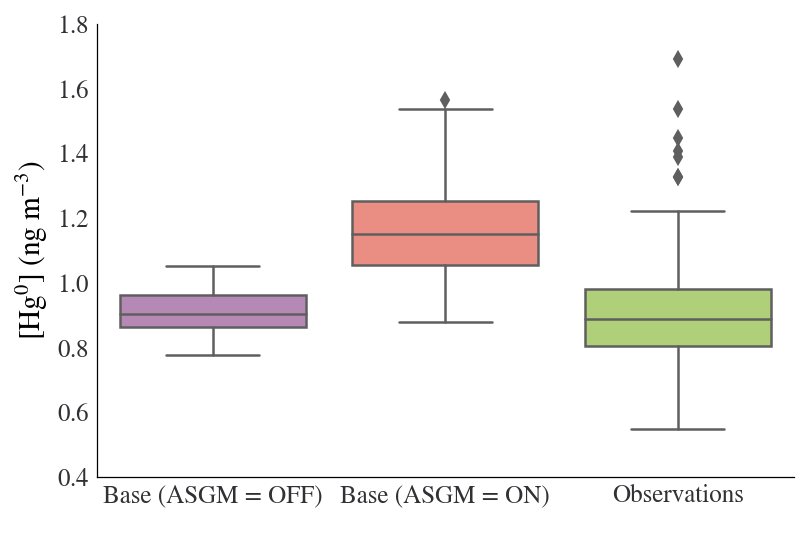

In [260]:
import seaborn as sns
# bplot = sns.boxplot(data=df_combined_noHR)
#boxes = ax.artists
colors={'GC_LoRes_NoASGM':'g','GC_LoRes_ASGM':'b','Observations':'r'}

clist=list(colors.keys())
df = pd.DataFrame(data=df_comb, columns=["Base (ASGM = OFF)", "Base (ASGM = ON)", "Observations"])
boxplot = sns.boxplot(x="variable", y="value", data=pd.melt(df))
#boxplot.axes.set_title("Distribution of Hg0 concentrations", fontsize=16)
boxplot.set_xlabel(" ", fontsize=14)
boxplot.set_ylabel("[Hg$^0$] (ng m$^{-3}$)", fontsize=14)
plt.show()

## Standardizing Data

In [261]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler() 
# GC_noasgm_st = scaler.fit_transform(GCno_asgm)
# GC_asgm_st = scaler.fit_transform(GC_asgmNC)
# obsNC_st = scaler.fit_transform(obsNC)

## Standardized Histplot

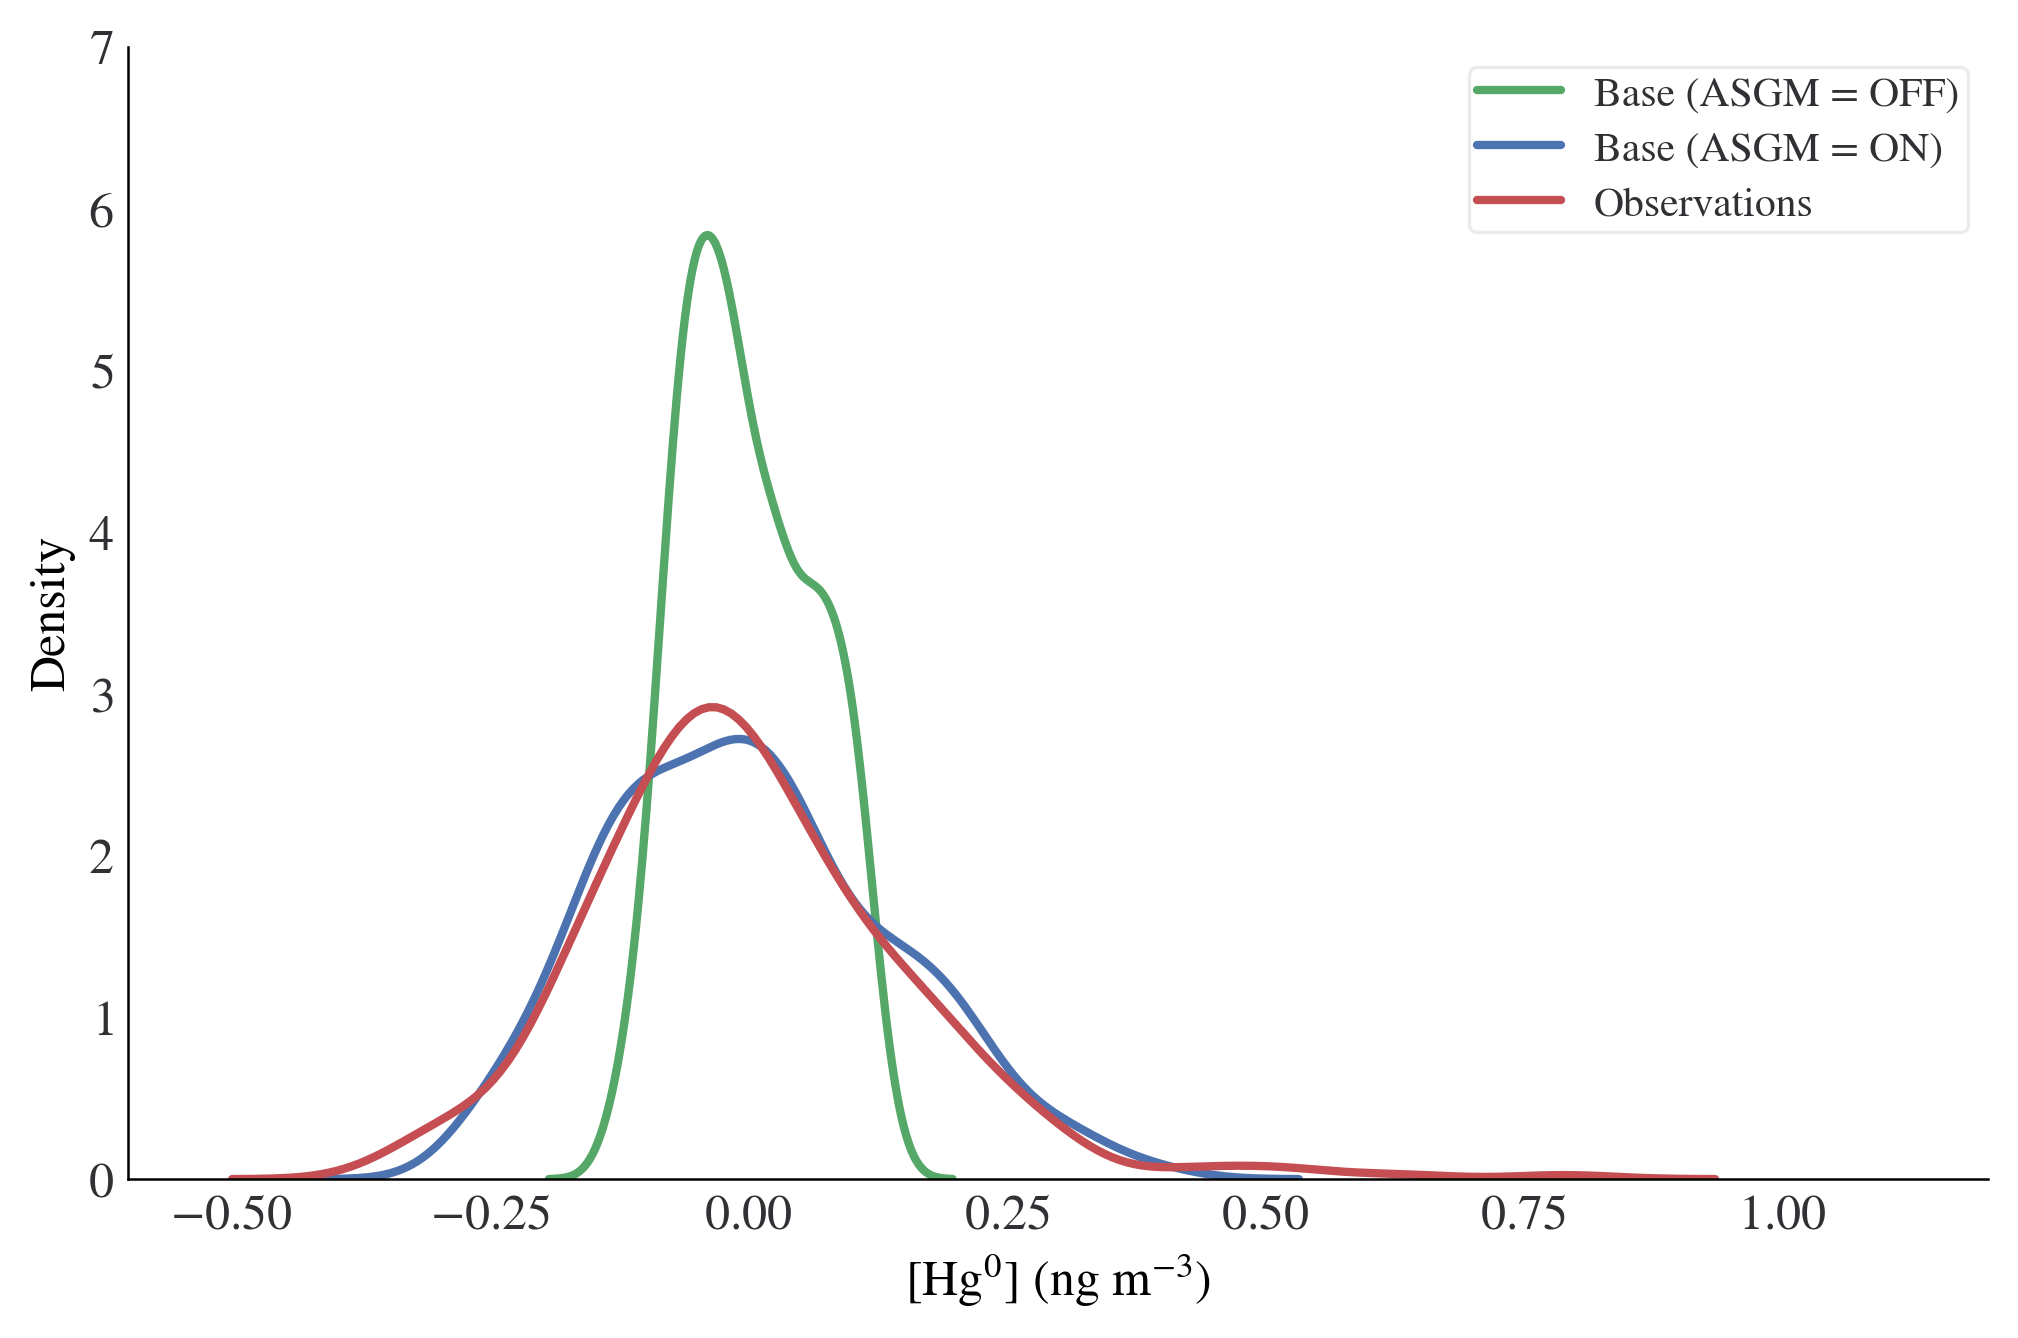

In [277]:
fig, ax = plt.subplots(figsize=(8,5))
#plt.figure(figsize=(8,5))
#plt.title('Standardized Predicted Hg Concentrations when ASGM Emissions are \nTurned Off vs when Turned On in GEOS-Chem',size=12,fontweight="bold")

sns.kdeplot(data=df_nc_standardized['Base (ASGM = OFF)'],ax =ax,color = 'g', fill=False,label = 'Base (ASGM = OFF)')
sns.kdeplot(data=df_nc_standardized['Base (ASGM = ON)'],ax =ax,color = 'b', fill=False,label ='Base (ASGM = ON)')
sns.kdeplot(data=df_nc_standardized['Observations'],ax =ax,color = 'r', fill=False,label = 'Observations')
plt.legend()
plt.xlabel('[Hg$^0$] (ng m$^{-3}$)')
name='Histplot_std_obsVmodel_v1'
savepath='/home/tzd/fs03/d1/tzd/Data_analysis/MIT_TPP_thesis/figures/ModelvsObs/'+name+'.pdf'
fig.savefig(savepath,bbox_inches='tight')#,bbox_extra_artists=(lgd,), bbox_inches='tight'
plt.show()

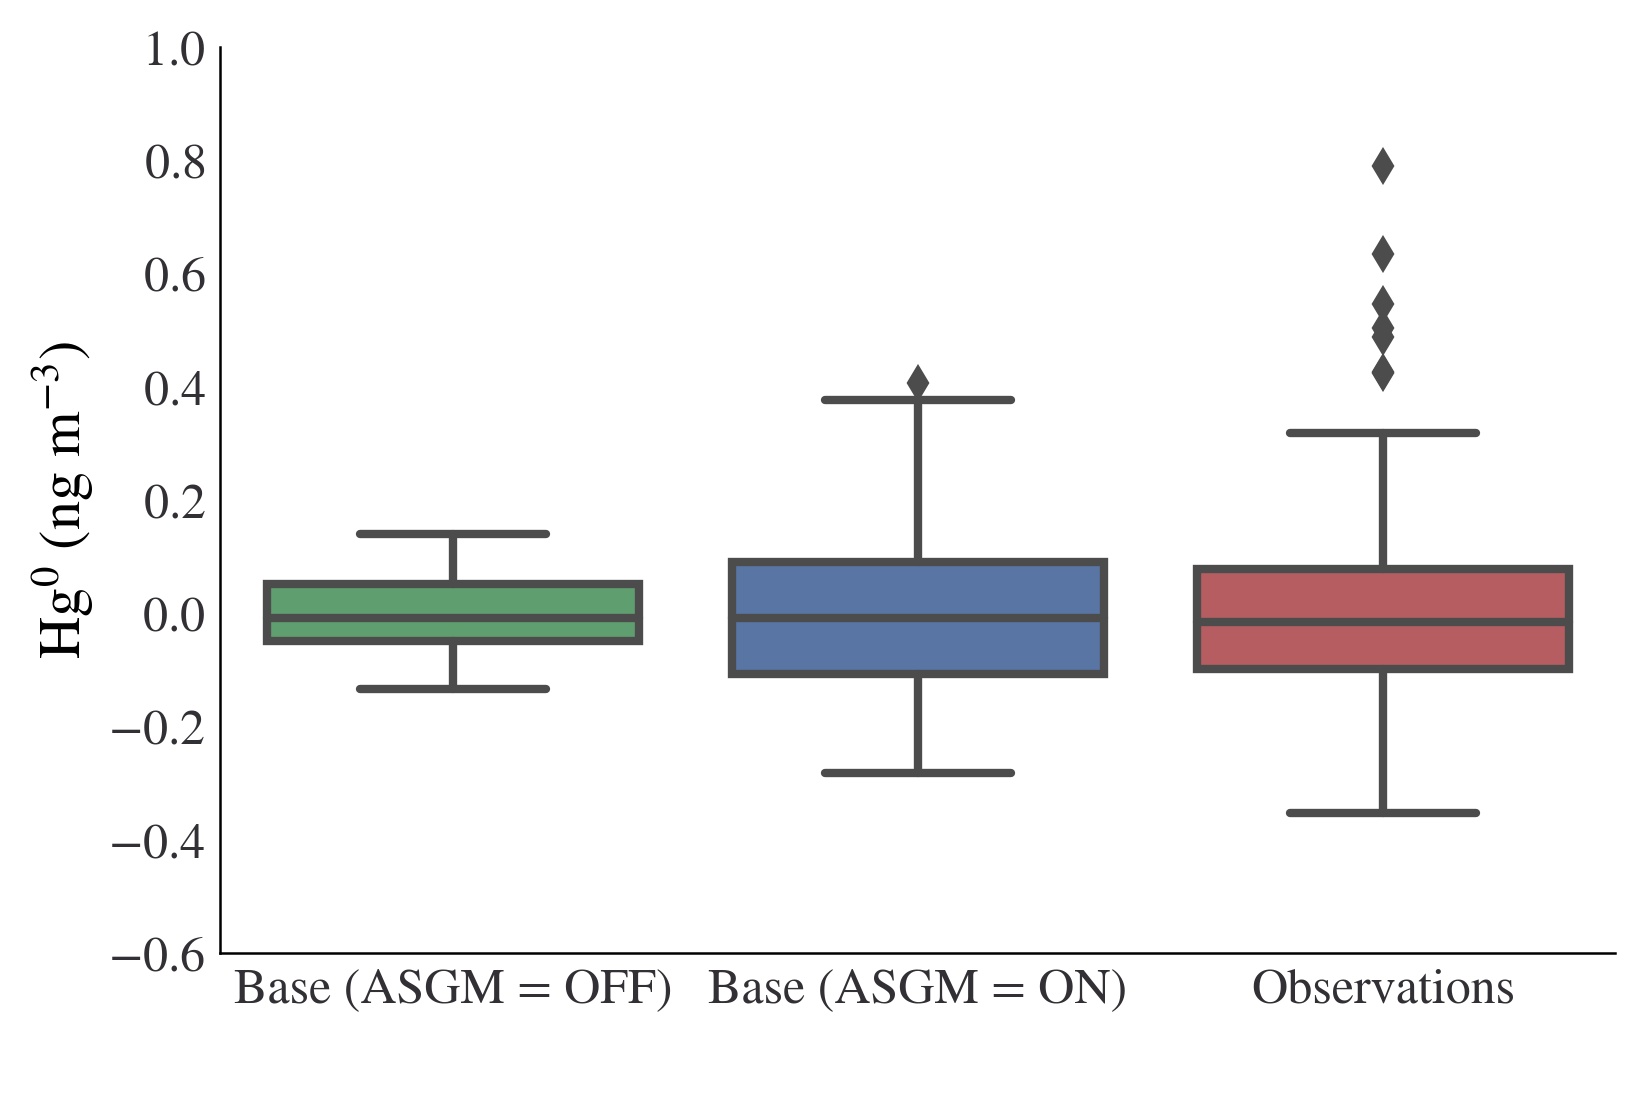

In [288]:
import seaborn as sns
# bplot = sns.boxplot(data=df_combined_noHR)
#boxes = ax.artists
colors={'Base (ASGM = OFF)':'g','Base (ASGM = ON)':'b','Observations':'r'}
name='Boxplot_std_obsVmodel_v1'
clist=list(colors.keys())
df = pd.DataFrame(data=df_nc_standardized, columns=["Base (ASGM = OFF)", "Base (ASGM = ON)", "Observations"])
boxplot = sns.boxplot(x="variable", y="value", data=pd.melt(df),palette=colors)
#boxplot.axes.set_title("Distribution of Hg0 concentrations", fontsize=16)
boxplot.set_xlabel(" ", fontsize=14)
boxplot.set_ylabel("Hg$^0$ (ng m$^{-3}$)", fontsize=14)
savepath='/home/tzd/fs03/d1/tzd/Data_analysis/MIT_TPP_thesis/figures/ModelvsObs/'+name+'.pdf'
fig.savefig(savepath)#,bbox_extra_artists=(lgd,), bbox_inches='tight'
plt.show()

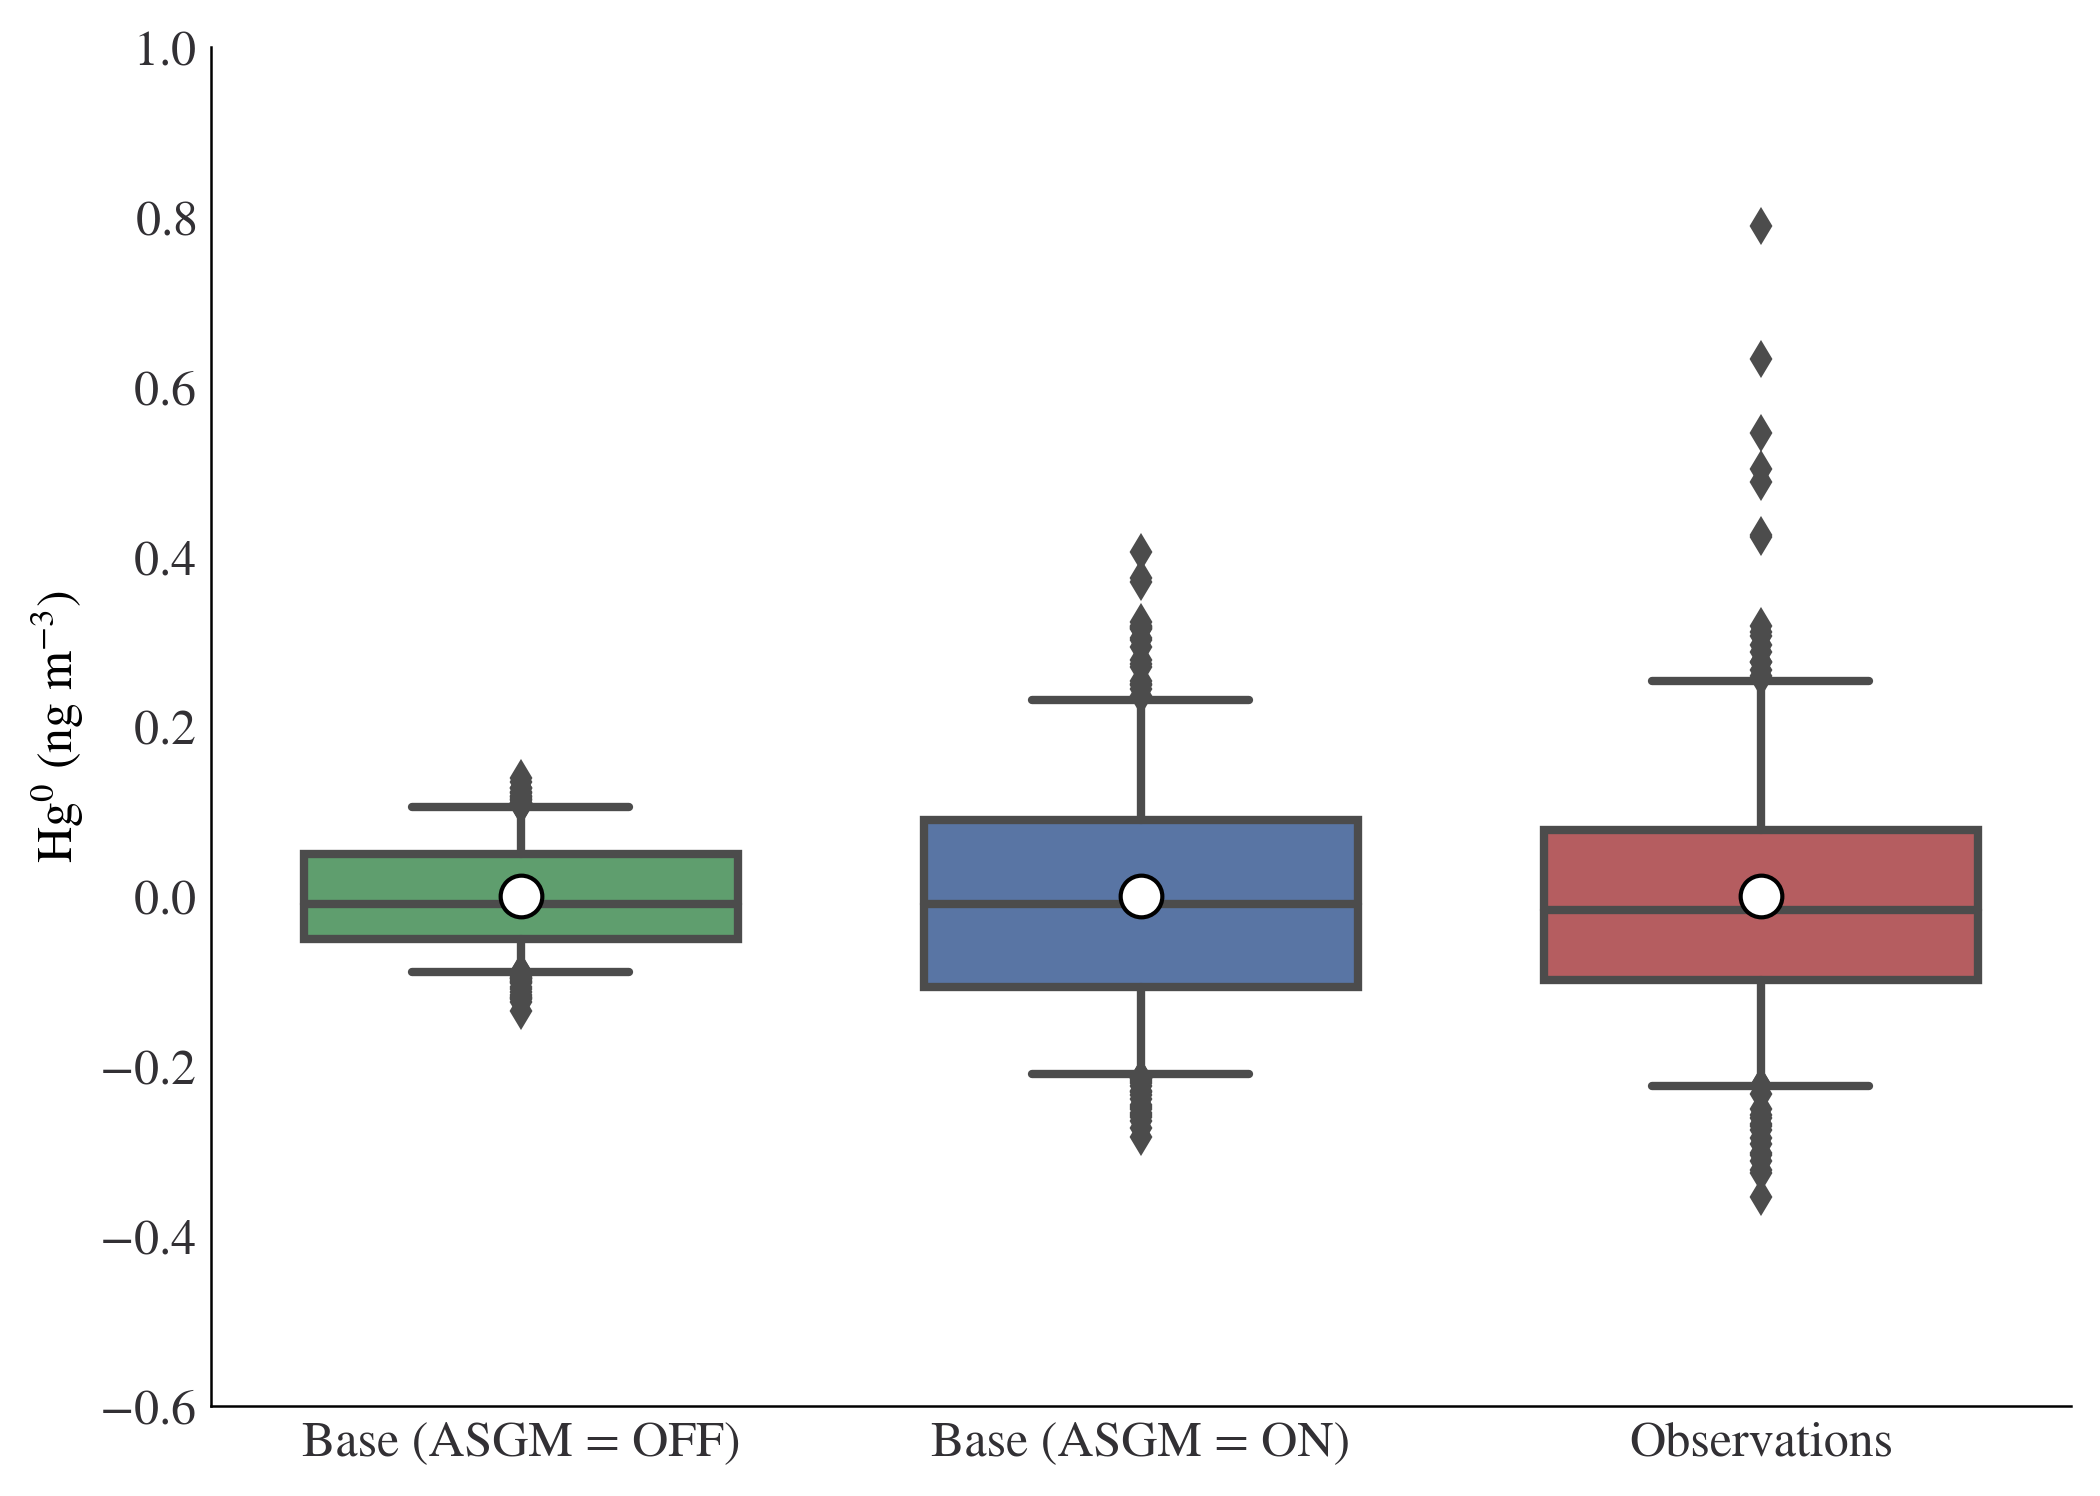

In [289]:
fig, ax = plt.subplots(figsize=(8,6))
name='Boxplot_std_obsVmodel_v1'

sns.boxplot(data=df_nc_standardized,showmeans=True,

            meanprops={"marker":"o",

                       "markerfacecolor":"white",

                       "markeredgecolor":"black",

                      "markersize":"10"}, width=0.7,whis=[5, 95],palette=colors)#notch=True, ) # df[['p1_satisfaction','p2_satisfaction','p3_satisfaction']]
#sns.swarmplot(data=df_all, color=".25")
plt.ylabel('Hg$^0$ (ng m$^{-3}$)')
savepath='/home/tzd/fs03/d1/tzd/Data_analysis/MIT_TPP_thesis/figures/ModelvsObs/'+name+'.pdf'
fig.savefig(savepath,bbox_inches='tight')#,bbox_extra_artists=(lgd,), bbox_inches='tight'
# Titles and labels
# plt.title("Comparison of Standardized Model Runs with Standardized Observations", fontsize=16)
plt.show()

In [ ]:
# fig, ax = plt.subplots(figsize=(8,5))
# #plt.figure(figsize=(8,5))
# plt.title('Histograms of Predicted Hg Concentrations when ASGM Emissions are \nTurned on in GEOS-Chem vs Observed Concentrations',size=12,fontweight="bold")
# sns.kdeplot(data=GC_asgm_st.squeeze(),ax =ax,color = 'blue', fill=False,label ='Reference Simulation \nwith ASGM Emissions')#,bw_adjust=0.5)
# #sns.kdeplot(data=GC_noasgm_st.squeeze(),ax =ax,color = 'g', fill=False,label = 'Reference Simulation \nwith  no ASGM Emissions',bw_adjust=0.5)
# sns.kdeplot(data=obsNC_st.squeeze(),ax =ax,color = 'red', fill=False,label = 'Observations')#,bw_adjust=0.5)
# plt.legend()
# plt.xlabel('[Hg$^0$] (ng m$^{-3}$)')
# plt.show()

In [ ]:
df_comb_st=df_comb[:]

In [ ]:
# #df_comb.columns=['GC_noASGM','GC_ASGM','Observations']
# df_comb_st['GC_noASGM']=GC_noasgm_st
# df_comb_st['GC_ASGM']=GC_asgm_st
# df_comb_st['Observations']=obsNC_st

<AxesSubplot:>

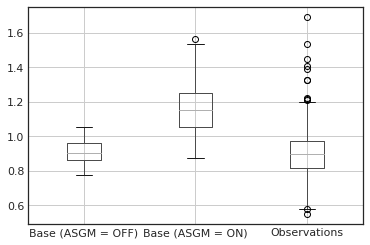

In [ ]:
df_comb_st.boxplot()

In [290]:
myMax=max(max(obsNC.value),max(GC_asgmNC.SpeciesConc_Hg0))

# Find Correlation

In [291]:
from scipy import stats
corr=stats.spearmanr(obsNC.value, GC_asgmNC.SpeciesConc_Hg0)
# from scipy import stats
# stats.spearmanr([1,2,3,4,5], [5,6,7,8,7])
corr[0]

nan

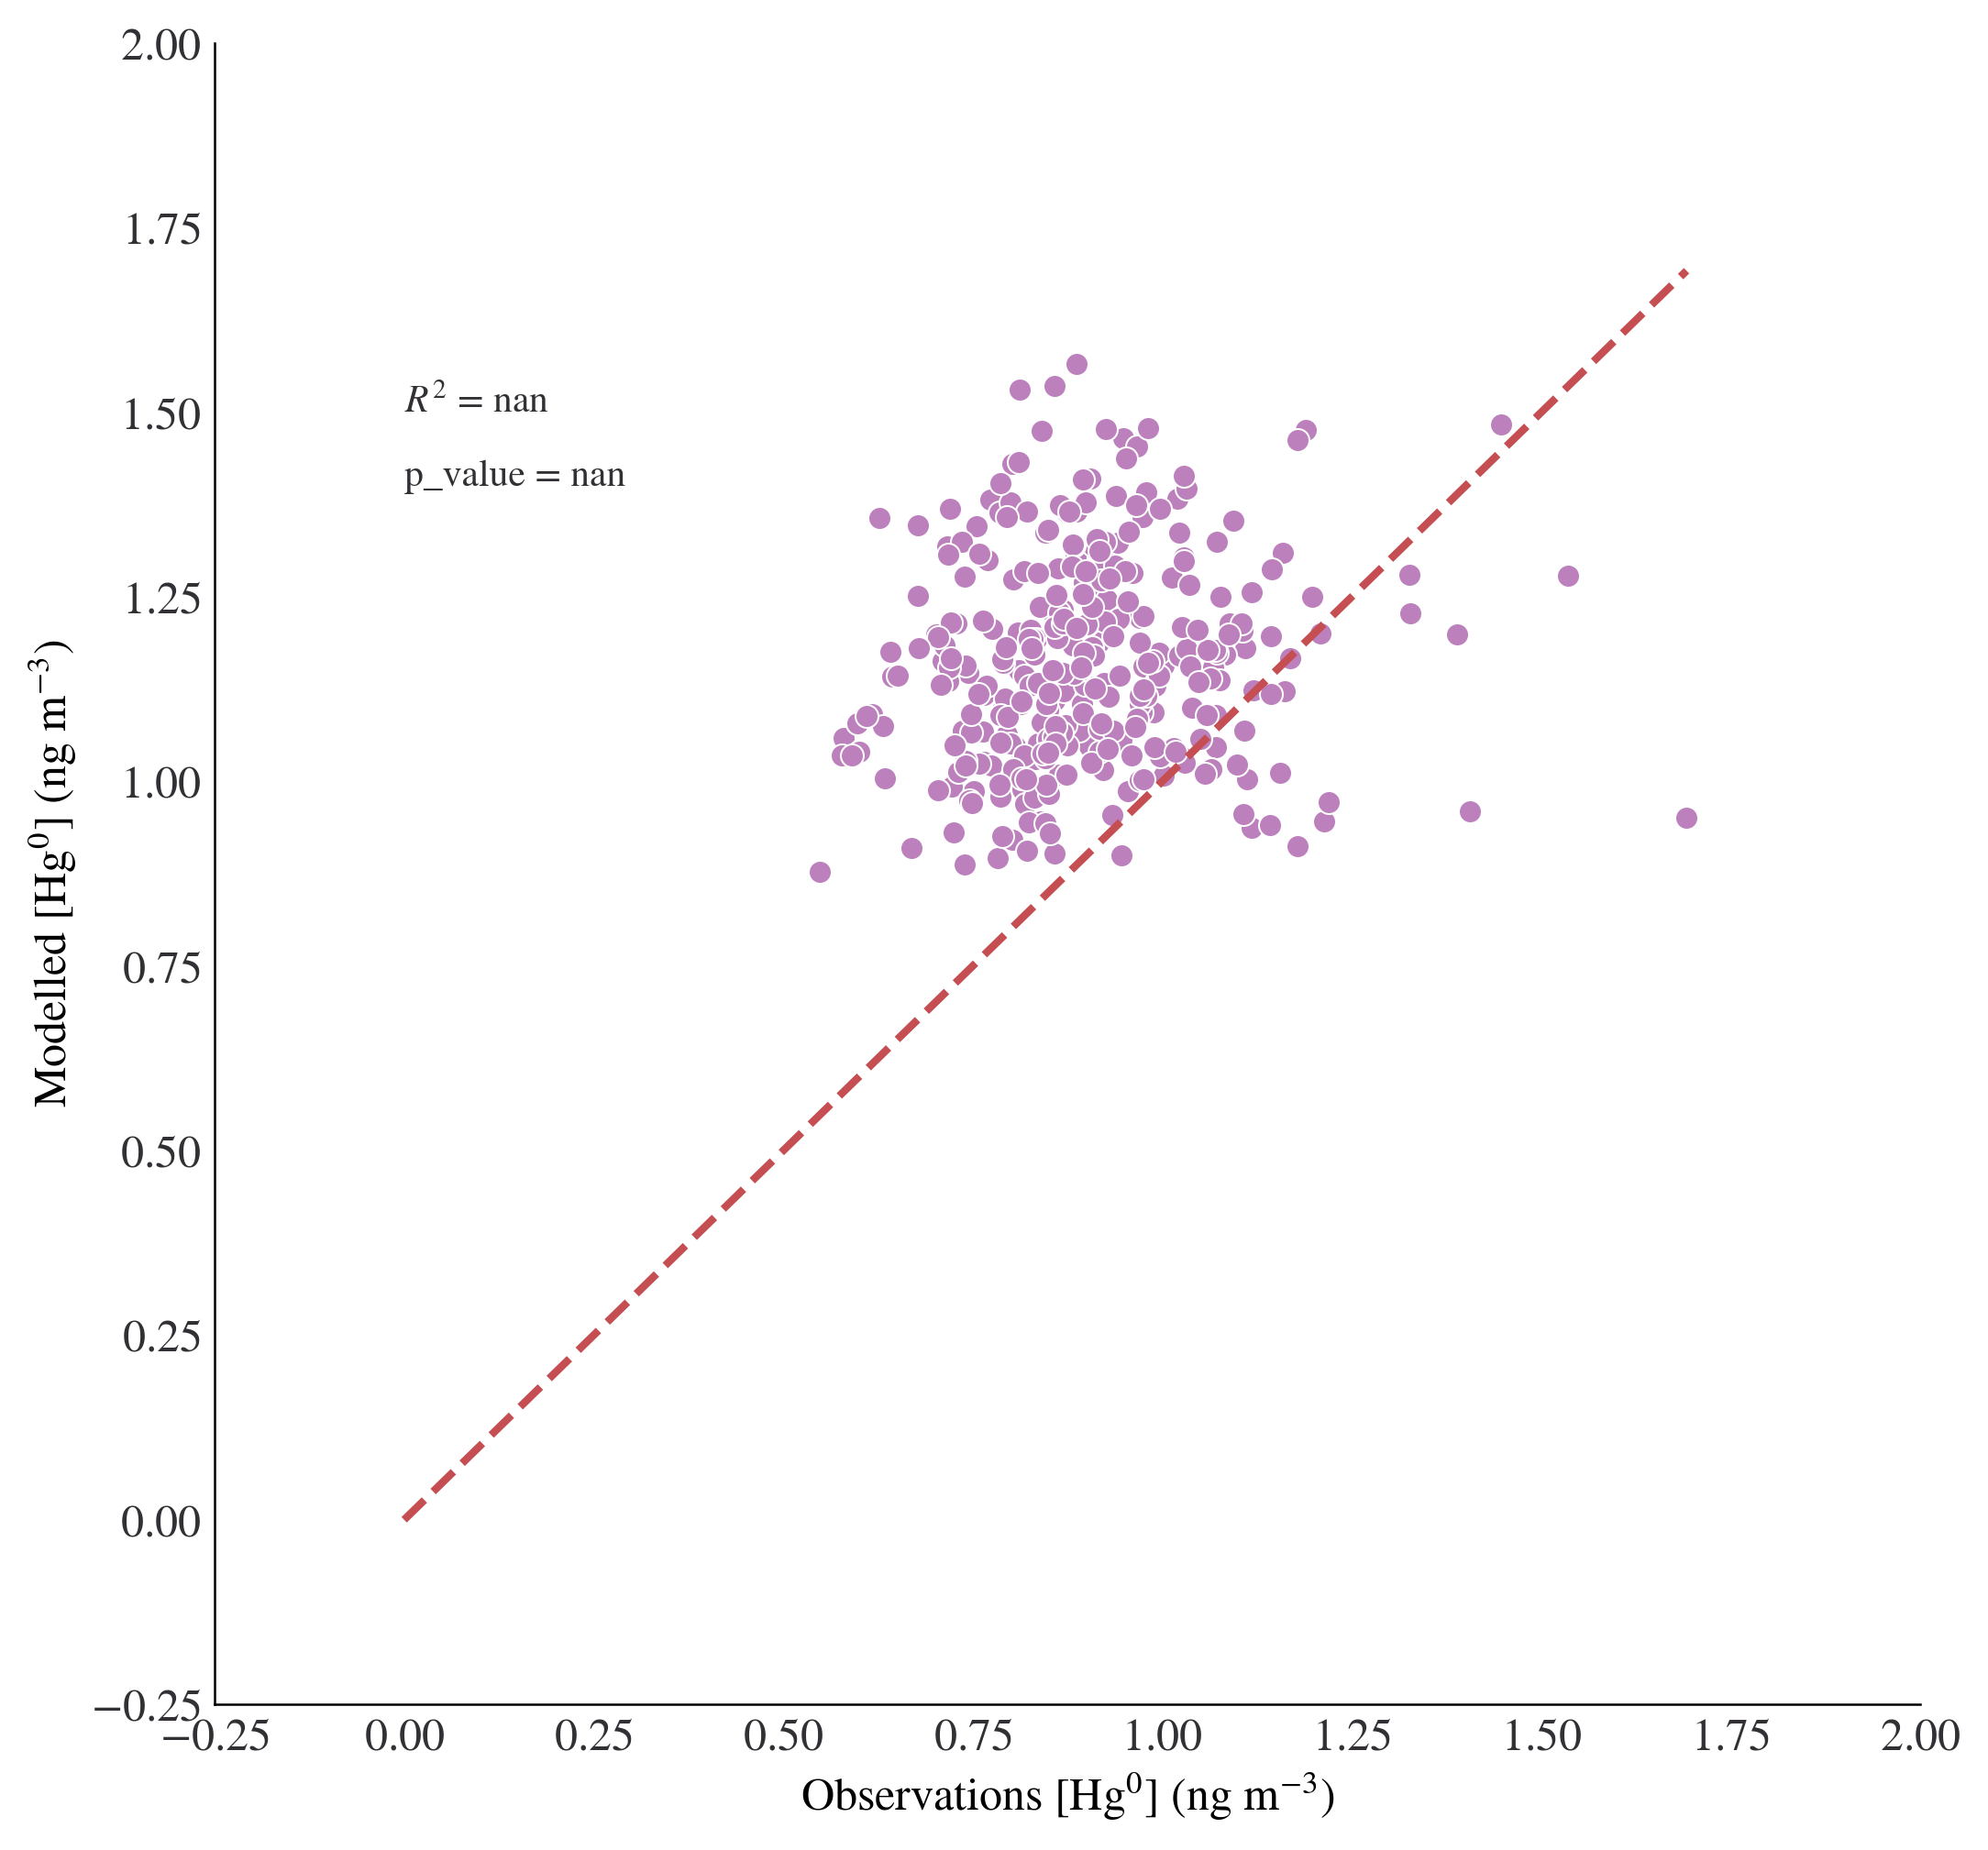

In [292]:
plt.figure(figsize=(8,8))
sns.scatterplot(obsNC.value,GC_asgmNC.SpeciesConc_Hg0, ci =95)
plt.xlabel('Observations [Hg$^0$] (ng m$^{-3}$)')
plt.ylabel('Modelled [Hg$^0$] (ng m$^{-3}$)')
plt.plot([0,myMax],[0,myMax],c='r',linestyle = 'dashed')
plt.annotate("$R^2$ = {:.3f}".format(corr[0]), (0, 1.5))
plt.annotate("p_value = {:.3f}".format(corr[1]), (0, 1.4))
# To show the plot
plt.show()

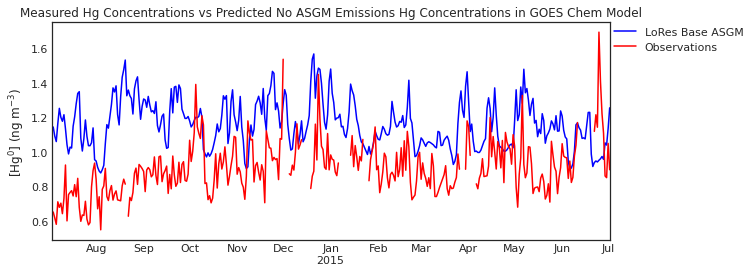

In [ ]:
fig=plt.figure(figsize=(10,4))
plt.title('Measured Hg Concentrations vs Predicted No ASGM Emissions Hg Concentrations in GOES Chem Model')
GC_asgm.SpeciesConc_Hg0.plot(color = 'blue',label = 'LoRes Base ASGM')
obsNC.value.plot(color = 'red',label = 'Observations')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=0)
plt.ylabel('[Hg$^0$] (ng m$^{-3}$)')
plt.xlabel('')
#plt.gca().axes.get_xaxis().set_visible(False)
plt.show()
#fig.savefig('MCMC_Refactored_Notebooks/MIT_TPP_thesis/figures/ModelvsObs/GC_base_ObsvNoASGMv1.png')

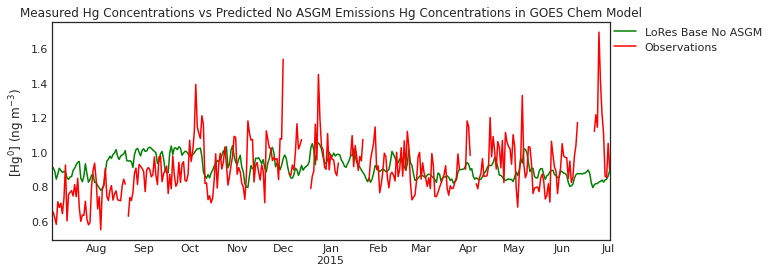

In [ ]:
fig=plt.figure(figsize=(10,4))
plt.title('Measured Hg Concentrations vs Predicted No ASGM Emissions Hg Concentrations in GOES Chem Model')
GCno_asgm.SpeciesConc_Hg0.plot(color = 'green',label = 'LoRes Base No ASGM')
obsNC.value.plot(color = 'red',label = 'Observations')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=0)
plt.ylabel('[Hg$^0$] (ng m$^{-3}$)')
plt.xlabel('')
#plt.gca().axes.get_xaxis().set_visible(False)
plt.show()
#fig.savefig('MCMC_Refactored_Notebooks/MIT_TPP_thesis/figures/ModelvsObs/GC_base_ObsvNoASGMv1.png')

In [ ]:
GC_asgmHiRes=getHiRes()[:end_date]

In [ ]:
obsNC=obsNC[:end_date]
GCno_asgm=GCno_asgm[:end_date]
GC_asgm=GC_asgm[:end_date]

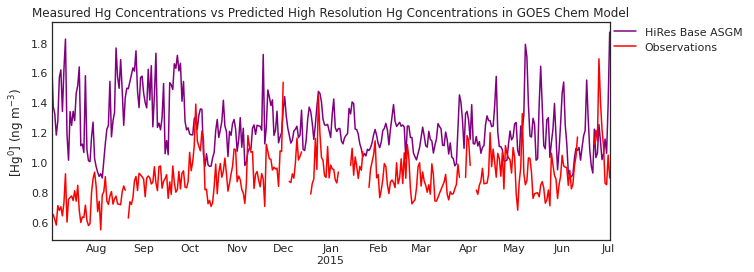

In [ ]:
fig=plt.figure(figsize=(10,4))
plt.title('Measured Hg Concentrations vs Predicted High Resolution Hg Concentrations in GOES Chem Model')
GC_asgmHiRes.SpeciesConc_Hg0.plot(color = 'purple',label = 'HiRes Base ASGM')
obsNC.value.plot(color = 'red',label = 'Observations')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=0)
plt.ylabel('[Hg$^0$] (ng m$^{-3}$)')
plt.xlabel('')
plt.show()
#fig.savefig('MCMC_Refactored_Notebooks/MIT_TPP_thesis/figures/ModelvsObs/GC_base_HiResASGMvObsv1.png')

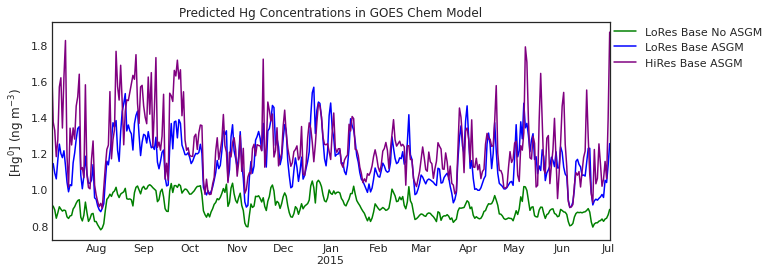

In [ ]:
fig=plt.figure(figsize=(10,4))
plt.title('Predicted Hg Concentrations in GOES Chem Model')
GCno_asgm.SpeciesConc_Hg0.plot(color = 'green',label = 'LoRes Base No ASGM')
GC_asgm.SpeciesConc_Hg0.plot(color = 'blue',label = 'LoRes Base ASGM')
GC_asgmHiRes.SpeciesConc_Hg0.plot(color = 'purple',label = 'HiRes Base ASGM')
#get_detrended_obs().value.plot(color = 'red',label = 'Observations')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=0)
plt.ylabel('[Hg$^0$] (ng m$^{-3}$)')
plt.xlabel('')
plt.show()
#fig.savefig('MCMC_Refactored_Notebooks/MIT_TPP_thesis/figures/ModelvsObs/GC_base_all.png')

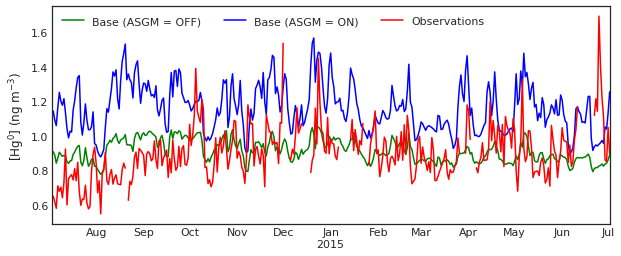

In [ ]:
fig=plt.figure(figsize=(10,4))
#plt.title('Predicted Hg Concentrations in GOES Chem Model')
GCno_asgm.SpeciesConc_Hg0.plot(color = 'green',label = 'Base (ASGM = OFF)')
GC_asgm.SpeciesConc_Hg0.plot(color = 'blue',label = 'Base (ASGM = ON)')
#GC_asgmHiRes.SpeciesConc_Hg0.plot(color = 'purple',label = 'HiRes Base ASGM')
obsNC.value.plot(color = 'red',label = 'Observations')
plt.legend(ncol=3)
#plt.legend(bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=0)
plt.ylabel('[Hg$^0$] (ng m$^{-3}$)')
plt.xlabel('')
plt.show()
#fig.savefig('MCMC_Refactored_Notebooks/MIT_TPP_thesis/figures/ModelvsObs/GC_base_allvObs.png')

In [ ]:
df_std

,Base (ASGM = OFF),Base (ASGM = ON),Observations
time,,,
2014-07-03,0.000313,-0.018322,-0.257695
2014-07-04,-0.004243,-0.017323,-0.250889
2014-07-05,-0.024033,-0.069105,-0.284314
2014-07-06,-0.070591,-0.101503,-0.322013
2014-07-07,-0.041172,0.002684,-0.191843
...,...,...,...
2015-06-28,-0.087816,-0.204272,0.204998
2015-06-29,-0.075168,-0.109208,-0.042455
2015-06-30,-0.070265,-0.121670,-0.052035


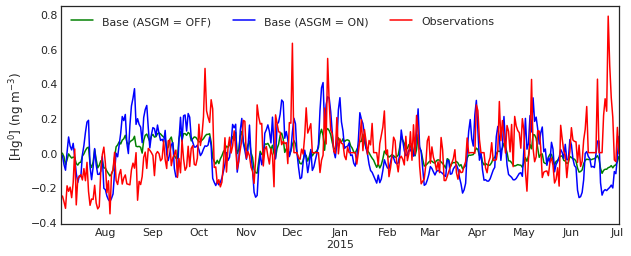

In [ ]:
fig=plt.figure(figsize=(10,4))
#plt.title('Predicted Hg Concentrations in GOES Chem Model')
df_std['Base (ASGM = OFF)'].plot(color = 'green',label = 'Base (ASGM = OFF)')
df_std['Base (ASGM = ON)'].plot(color = 'blue',label = 'Base (ASGM = ON)')
#GC_asgmHiRes.SpeciesConc_Hg0.plot(color = 'purple',label = 'HiRes Base ASGM')
df_std['Observations'].plot(color = 'red',label = 'Observations')
plt.legend(ncol=3)
#plt.legend(bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=0)
plt.ylabel('[Hg$^0$] (ng m$^{-3}$)')
plt.xlabel('')
plt.show()
#fig.savefig('MCMC_Refactored_Notebooks/MIT_TPP_thesis/figures/ModelvsObs/GC_base_allvObs.png')

### Correlation with all

In [ ]:

corr_LR_asgm=stats.spearmanr(obsNC.value, GC_asgm.SpeciesConc_Hg0)
corr_LR_Nasgm=stats.spearmanr(obsNC.value, GCno_asgm.SpeciesConc_Hg0)
corr_HR_asgm=stats.spearmanr(obsNC.value, GC_asgmHiRes.SpeciesConc_Hg0)
print(f"Low res No ASGM vs Obs:{corr_LR_Nasgm[0]} \n")
print(f"Low res ASGM vs Obs:{corr_LR_asgm[0]} \n")
print(f"High res ASGM vs Obs:{corr_HR_asgm[0]} \n")

Low res No ASGM vs Obs:nan 

Low res ASGM vs Obs:nan 

High res ASGM vs Obs:nan 



In [294]:
dfNC=df_normal_conditions
# dfNC['Base (ASGM = OFF)']=GCno_asgm.SpeciesConc_Hg0
# dfNC['Base (ASGM = ON)']=GC_asgm.SpeciesConc_Hg0
# dfNC['HiRes Base (ASGM = ON)']=GC_asgmHiRes.SpeciesConc_Hg0
dfNC.dropna(inplace=True)

In [295]:
dfNC.describe()

,Base (ASGM = OFF),Base (ASGM = ON),Observations
count,332.000000,332.000000,332.000000
mean,0.913107,1.162542,0.902002
std,0.064446,0.140360,0.155164
min,0.776879,0.877226,0.548148
25%,0.860411,1.051516,0.802995
50%,0.904538,1.154742,0.886260
75%,0.970409,1.256750,0.979953
max,1.051066,1.565660,1.691778


In [308]:
def myscater(x,y,xname,yname,tit,ax,my_stats):
    pearson,r_squared,spearman=my_stats
    style = dict(size=10, color='gray')

    lineStart =x.min() 
    lineEnd = x.max()  

    #asign colors
    if ax ==2:
        col='purple'
        axes[ax,1].set_title(tit)
        axes[ax,0].set_title('Observed vs Modelled Hg Concentrations at CHC')
        statxloc=1.3
        rsyloc=0.8
        ryloc= 0.7
        r2yloc=0.6
    elif ax ==1:
        col=plot_colors['Base (ASGM = ON)']
        statxloc=1.3
        rsyloc=0.8
        ryloc= 0.7
        r2yloc=0.6
    elif ax==0:
        col=plot_colors['Base (ASGM = OFF)']
        statxloc=1
        rsyloc=1.6
        ryloc= 1.5
        r2yloc=1.4
   
    tseries_line=axes[ax,0].plot(y,color = col,label=yname)
    tseries_obs=axes[ax,0].plot(x,color = plot_colors['Observations'],label='Observations')

    axes[ax,0].set_ylabel('Hg$^0$ (ng m$^{-3}$)')
    axes[ax,0].set_xlabel('')

    #scatter
    dot=axes[ax,1].scatter(x, y, color = 'k', alpha=0.5,label='Hg$^0$')
    one21= axes[ax,1].plot([lineStart, lineEnd], [lineStart, lineEnd],'r--',label='1 to 1 line')
    axes[ax,1].text(statxloc, ryloc, f'$r$ = {pearson}', **style)
    axes[ax,1].text(statxloc, r2yloc, f'$R^2$ = {r_squared}', **style)
    axes[ax,1].text(statxloc, rsyloc, f'$r_s$ = {spearman}', **style)
    #axes[ax].xlim(lineStart, lineEnd)
    #axes[ax].ylim(lineStart, lineEnd)
    axes[ax,1].set_ylabel(yname)
    if ax==1:
        axes[ax,1].set_xlabel(xname)
        axes[ax,0].set_xlabel('Time')
    return tseries_line,tseries_obs,dot,one21
#         a33=axes[ax,0].plot(x,color = 'k',label='Observations')
#         a44=axes[ax,1].scatter(x, y, color = 'k', alpha=0.5)
#         a55=axes[ax,1].plot([lineStart, lineEnd], [lineStart, lineEnd],'r--')
#         return a33,a44,a55
        
    style = dict(size=10, color='gray')




Base (ASGM = OFF)

Pearsons correlation:0.1435 and the R-squared value is: 0.020601

The spearman orrelation between Base (ASGM = OFF) and observations is: 0.1737  and the Ttest is :-1.2 and the p-value is :0.2289161719225206


Base (ASGM = ON)

Pearsons correlation:0.1042 and the R-squared value is: 0.010862

The spearman orrelation between Base (ASGM = ON) and observations is: 0.1339  and the Ttest is :-22.69 and the p-value is :9.356822067179048e-85



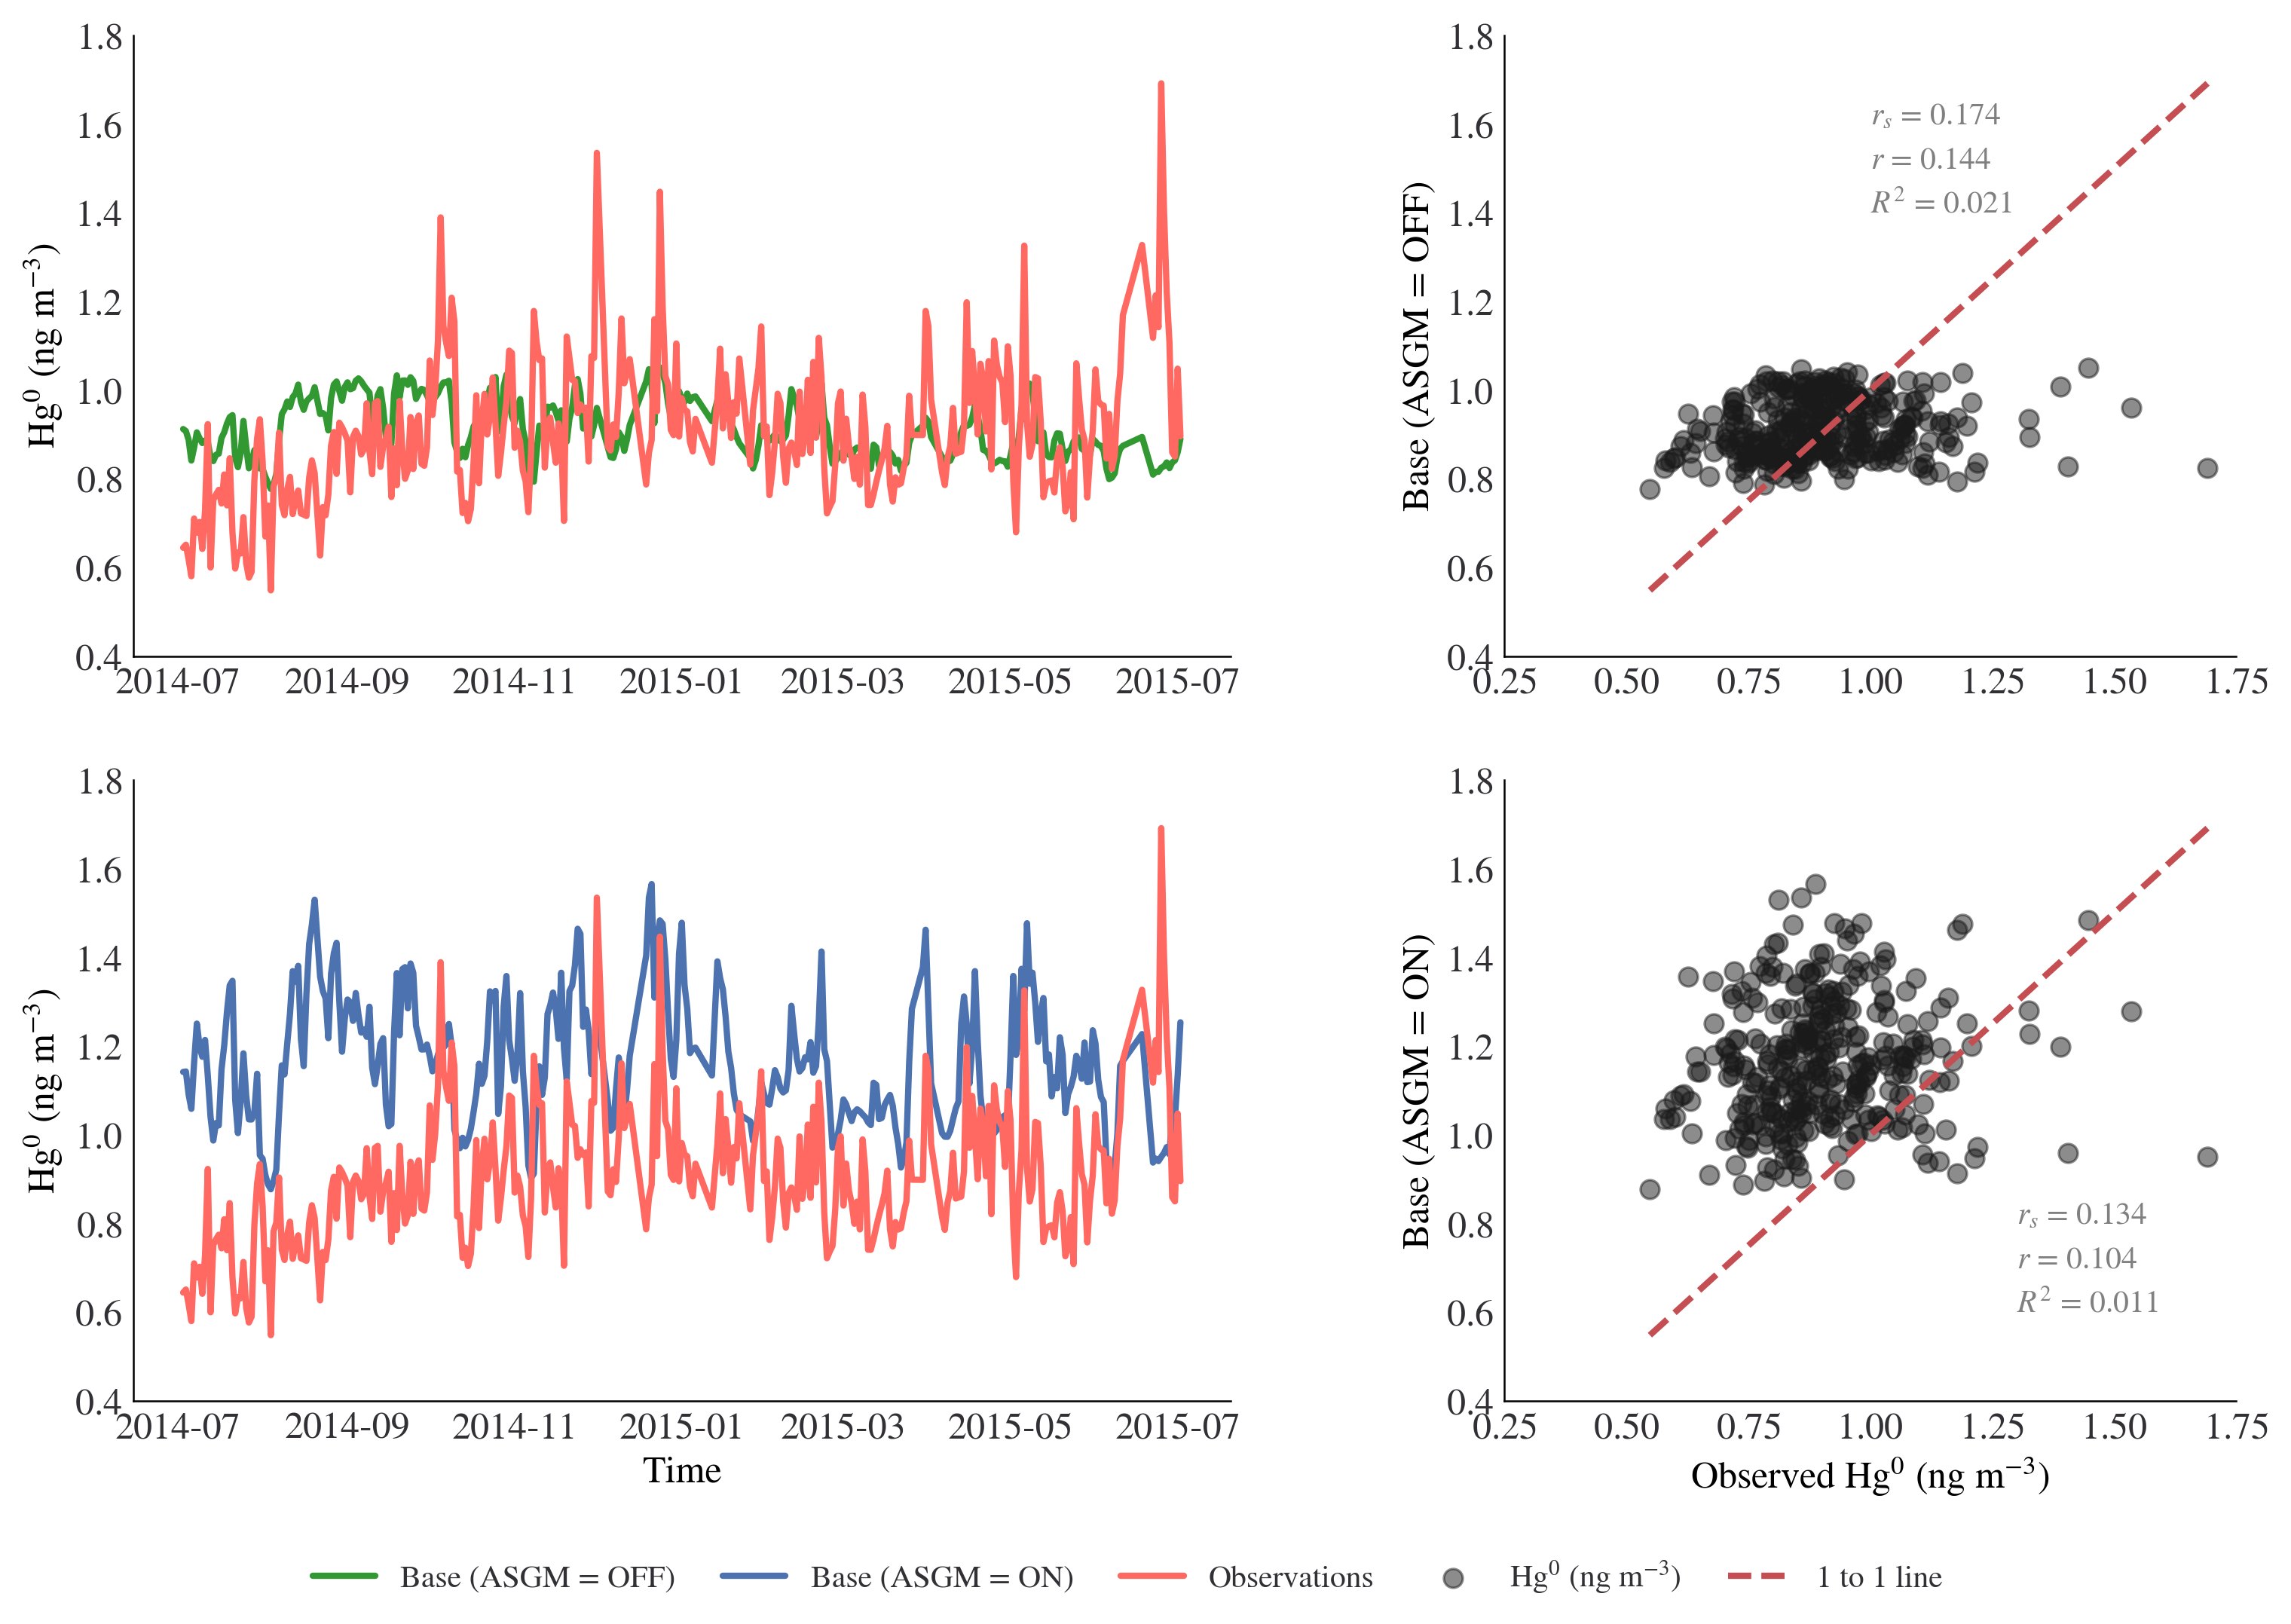

In [309]:
from scipy import stats
from sklearn.metrics import r2_score 
models=['Base (ASGM = OFF)','Base (ASGM = ON)'] #','LoRes_Base_No ASGM']
obs_d='Observations'
df_0NA=dfNC #.dropna()
fig,axes = plt.subplots(nrows=2,ncols=2,figsize=(12,8),gridspec_kw={'width_ratios':[3, 2],'wspace':0.3,'hspace':0.2})
i=0
leglabels={}
for mod in models:
    print('\n'+mod+'\n')
    tit= 'Hg$^0$ concentrations (ng m$^{-3}$) at CHC'
    xname='Observed Hg$^0$ (ng m$^{-3}$)'
    yname=mod.replace('_',' ')
    
    # calculate Pearson's correlation
    corr_p, _ = stats.pearsonr(df_0NA[obs_d],df_0NA[mod])
    print(f'Pearsons correlation:{round(corr_p,4)} and the R-squared value is: {round(corr_p**2,6)}\n')
    # Perform the two sample t-test with equal variances
    t_test=stats.ttest_ind(a=df_0NA[obs_d], b=df_0NA[mod], equal_var=True)
    
    corr_s=stats.spearmanr(df_0NA[obs_d], df_0NA[mod])
    print(f"The spearman orrelation between {mod} and observations is: {round(corr_s[0],4)}  and the Ttest is :{round(t_test[0],2)} and the p-value is :{t_test[1]}\n")#The R-squared Value of {mod} is: {R_square} \
    my_stats=["{:.3}".format(corr_p),"{:.2}".format(corr_p**2), "{:.3}".format(corr_s[0])]
    
    
    
    tseries_line,tseries_obs,dot,one21=myscater(df_0NA[obs_d],df_0NA[mod],xname,yname,tit,i,my_stats)
    leglabels[i]={'tseries_line':tseries_line,'tseries_obs':tseries_obs,'dot':dot,'one21':one21}
    i+=1

lines = []
labels = []
  
for ax in fig.axes:
    Line, Label = ax.get_legend_handles_labels()
    # print(Label)
    lines.extend(Line)
    labels.extend(Label)

from collections import OrderedDict
by_label = OrderedDict(zip(labels, lines))
#odict_keys(['Base (ASGM = OFF) model', 'Observations', 'Hg$^0$', '1 to 1 line', 'Base (ASGM = ON) model'])
ulines=[by_label['Base (ASGM = OFF)'],
by_label['Base (ASGM = ON)'],
by_label['Observations'],
by_label['Hg$^0$'],
by_label['1 to 1 line']]
ulabels=['Base (ASGM = OFF)',
        'Base (ASGM = ON)',
         'Observations',
         'Hg$^0$ (ng m$^{-3}$)',
         '1 to 1 line']
fig.legend(ulines, ulabels, frameon=False, bbox_to_anchor=(0.8, 0.05),ncol=6)
name='TimeSeriesNsactter_obsVmodel_v1'
savepath='/home/tzd/fs03/d1/tzd/Data_analysis/MIT_TPP_thesis/figures/ModelvsObs/'+name+'.pdf'
fig.savefig(savepath,bbox_inches='tight')
plt.show()

In [ ]:
by_label.keys()

odict_keys(['Base (ASGM = OFF) model', 'Observations', 'Hg$^0$', '1 to 1 line', 'Base (ASGM = ON) model'])

In [ ]:
dfNC.describe()

,value,Base (ASGM = OFF),Base (ASGM = ON),HiRes Base (ASGM = ON)
count,365.000000,365.000000,365.000000,365.000000
mean,0.902002,0.911644,1.160192,1.241600
std,0.147964,0.063069,0.137956,0.186234
min,0.548148,0.776879,0.877226,0.895046
25%,0.814219,0.861088,1.053089,1.111275
50%,0.898857,0.902520,1.151208,1.219470
75%,0.970871,0.961748,1.250599,1.332599
max,1.691778,1.051066,1.565660,1.870308


In [ ]:
dfNC

,value,Base (ASGM = OFF),Base (ASGM = ON),HiRes Base (ASGM = ON)
tstamp,,,,
2014-07-03,0.644308,0.911956,1.141870,1.691530
2014-07-04,0.651114,0.907401,1.142869,1.372548
2014-07-05,0.617688,0.887611,1.091087,1.326379
2014-07-06,0.579989,0.841053,1.058690,1.181803
2014-07-07,0.710160,0.870472,1.162876,1.274519
...,...,...,...,...
2015-06-28,1.107000,0.823827,0.955920,1.057068
2015-06-29,0.859547,0.836476,1.050984,1.155254
2015-06-30,0.849968,0.841379,1.038522,1.060115


In [ ]:
def variance(data):
     # Number of observations
    n = len(data)
    # Mean of the data
    mean = sum(data) / n
    # Square deviations
    deviations = [(x - mean) ** 2 for x in data]
    # Variance
    variance = sum(deviations) / n
    return variance

In [ ]:
np.std(dfNC[mod].values)

0.13776642

# Advanced Time Series Analysis

In [ ]:
from scipy.stats import iqr
from scipy import mean
import statistics as stat

for mod in dfNC.columns.values:
    av = mean(dfNC[mod].values)
    vari= np.var(dfNC[mod].values)
    stand =np.std(dfNC[mod].values)
    IQR = iqr(dfNC[mod].values),3)
   
    print(f'{mod} has mean of: {av:.3f} ')
    print(f'{mod} has variance of: {vari:.3f} ')
    print(f'{mod} has standard deviation of: {stand:.3f} ')
    print(f'{mod} has iqr of: {IQR:.3f} \n')
   

SyntaxError: unmatched ')' (729996641.py, line 9)

# Mean Squared Error

In [ ]:
def nrmse(obs,pred,type='sd'):
    squared_sums = sum((obs - pred)**2)
    mse = squared_sums/len(obs)
    rmse= np.sqrt(mse)
    if type == "sd":
        nrmse = rmse/np.std(obs)
    elif type == "mean":
        nrmse = rmse/mean(obs)
    elif type == "maxmin":
        nrmse = rmse/ (max(obs) - min(obs))
    elif type == "iq":
        nrmse = rmse/ (np.quantile(obs, 0.75) - np.quantile(obs, 0.25))
    else:
         print("Wrong type!")
    nrmse = round(nrmse, 3)
    return(nrmse)


In [ ]:
emetrics=['sd',"mean","maxmin","iq"]
sims=['LoRes_Base_No ASGM','LoRes_Base ASGM','HiRes_Base_ASGM']
simNRMSE={}
for sim in sims:
    nnrmse={}
    for metric in emetrics:
        nnrmse[metric]=nrmse(dfNC['value'],dfNC[sim],metric)
    
    simNRMSE[sim]=nnrmse  
simNRMSE

{'LoRes_Base_No ASGM': {'sd': 1.033,
  'mean': 0.169,
  'maxmin': 0.133,
  'iq': 0.974},
 'LoRes_Base ASGM': {'sd': 2.176, 'mean': 0.356, 'maxmin': 0.281, 'iq': 2.052},
 'HiRes_Base_ASGM': {'sd': 2.803, 'mean': 0.459, 'maxmin': 0.362, 'iq': 2.643}}

In [ ]:
pd.DataFrame(simNRMSE)

,LoRes_Base_No ASGM,LoRes_Base ASGM,HiRes_Base_ASGM
sd,1.033,2.176,2.803
mean,0.169,0.356,0.459
maxmin,0.133,0.281,0.362
iq,0.974,2.052,2.643


In [ ]:
df_obsVnoASGM=dfNC[['value','LoRes_Base_No ASGM']]
df_obsVnoASGM

,value,LoRes_Base_No ASGM
tstamp,,
2014-07-03,0.644308,0.911956
2014-07-04,0.651114,0.907401
2014-07-05,0.617688,0.887611
2014-07-06,0.579989,0.841053
2014-07-07,0.710160,0.870472
...,...,...
2015-06-28,1.107000,0.823827
2015-06-29,0.859547,0.836476
2015-06-30,0.849968,0.841379


In [ ]:
from statsmodels.tsa.stattools import grangercausalitytests
gc_res = grangercausalitytests(df_obsVnoASGM,100)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3717  , p=0.5424  , df_denom=361, df_num=1
ssr based chi2 test:   chi2=0.3748  , p=0.5404  , df=1
likelihood ratio test: chi2=0.3746  , p=0.5405  , df=1
parameter F test:         F=0.3717  , p=0.5424  , df_denom=361, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.2437  , p=0.1075  , df_denom=358, df_num=2
ssr based chi2 test:   chi2=4.5502  , p=0.1028  , df=2
likelihood ratio test: chi2=4.5219  , p=0.1043  , df=2
parameter F test:         F=2.2437  , p=0.1075  , df_denom=358, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.8345  , p=0.1405  , df_denom=355, df_num=3
ssr based chi2 test:   chi2=5.6119  , p=0.1321  , df=3
likelihood ratio test: chi2=5.5688  , p=0.1346  , df=3
parameter F test:         F=1.8345  , p=0.1405  , df_denom=355, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.3843  , p=0.2389  

In [ ]:
dfNC
dfNC = dfNC.rename_axis('Source', axis=1)

In [ ]:
n_obs = 292
df_train, df_test = dfNC[0:-n_obs], dfNC[-n_obs:]

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss

def kpss_test(df):    
    statistic, p_value, n_lags, critical_values = kpss(df.values)
    
    print(f'KPSS Statistic: {statistic}')
    print(f'p-value: {p_value}')
    print(f'num lags: {n_lags}')
    print('Critial Values:')
    for key, value in critical_values.items():
        print(f'   {key} : {value}')

def adf_test(df):
    result = adfuller(df.values)
    print('ADF Statistics: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))
        


print('kpss_test: Observations time series')
kpss_test(df_train['value'])
print('kpss_test: LoRes_Base_No ASGM time series')
kpss_test(df_train['LoRes_Base_No ASGM'])
print('kpss_test: LoRes_Base ASGM time series')
kpss_test(df_train['LoRes_Base ASGM'])
print('kpss_test: HiRes_Base_ASGM time series')
kpss_test(df_train['HiRes_Base_ASGM'])
        
print('\nADF Test: Observations time series')
adf_test(df_train['value'])
print('ADF Test: LoRes_Base_No ASGM time series')
adf_test(df_train['LoRes_Base_No ASGM'])
print('ADF Test: LoRes_Base ASGM time series')
adf_test(df_train['LoRes_Base ASGM'])
print('ADF Test: HiRes_Base_ASGM time series')
adf_test(df_train['HiRes_Base_ASGM'])

kpss_test: Observations time series
KPSS Statistic: 1.0739451753335474
p-value: 0.01
num lags: 4
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
kpss_test: LoRes_Base_No ASGM time series
KPSS Statistic: 0.8414301766670595
p-value: 0.01
num lags: 5
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
kpss_test: LoRes_Base ASGM time series
KPSS Statistic: 0.46781955525304064
p-value: 0.04891451458264851
num lags: 5
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
kpss_test: HiRes_Base_ASGM time series
KPSS Statistic: 0.3253703055739405
p-value: 0.1
num lags: 4
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739

ADF Test: Observations time series
ADF Statistics: -4.570344
p-value: 0.000146
Critical values:
	1%: -3.525
	5%: -2.903
	10%: -2.589
ADF Test: LoRes_Base_No ASGM time series
ADF Statistics: -1.520616
p-value: 0.523289
Critical values:
	1%: -3.527
	5%: -2.904
	10%: -2.589
ADF Test: Lo

/home/tzd/anaconda3/envs/Jlab/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(
/home/tzd/anaconda3/envs/Jlab/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(
/home/tzd/anaconda3/envs/Jlab/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


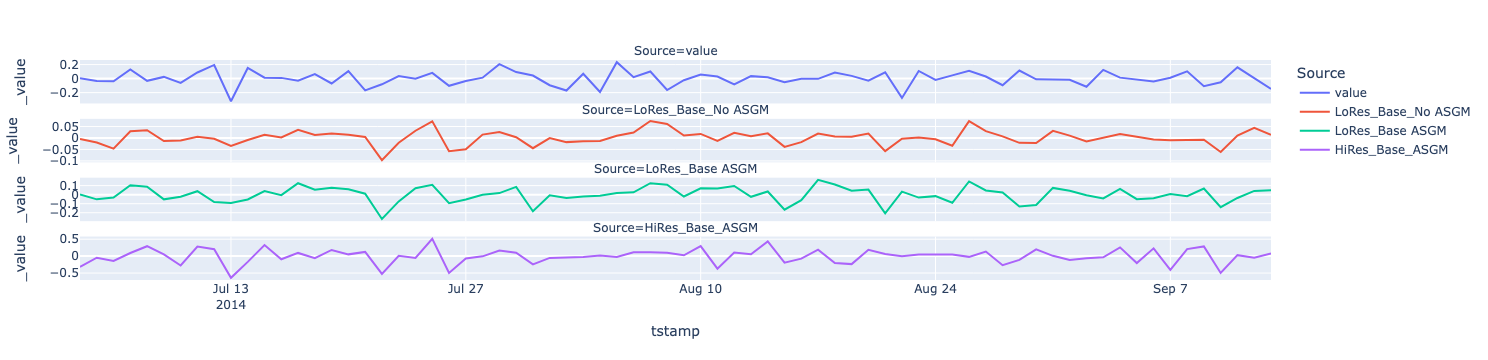

In [ ]:
import plotly.express as px
df_train_transformed = df_train.diff().dropna()

fig = px.line(df_train_transformed,facet_col="Source", facet_col_wrap=1)
fig.update_yaxes(matches=None)
fig.show()


In [ ]:
print('kpss_test: Observations time series')
kpss_test(df_train_transformed['value'])
print('kpss_test: LoRes_Base_No ASGM time series')
kpss_test(df_train_transformed['LoRes_Base_No ASGM'])
print('kpss_test: LoRes_Base ASGM time series')
kpss_test(df_train_transformed['LoRes_Base ASGM'])
print('kpss_test: HiRes_Base_ASGM time series')
kpss_test(df_train_transformed['HiRes_Base_ASGM'])

kpss_test: Observations time series
KPSS Statistic: 0.06800886027161386
p-value: 0.1
num lags: 9
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
kpss_test: LoRes_Base_No ASGM time series
KPSS Statistic: 0.0748863169586035
p-value: 0.1
num lags: 4
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
kpss_test: LoRes_Base ASGM time series
KPSS Statistic: 0.04865256011665356
p-value: 0.1
num lags: 3
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
kpss_test: HiRes_Base_ASGM time series
KPSS Statistic: 0.3094077129604611
p-value: 0.1
num lags: 48
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739


/home/tzd/anaconda3/envs/Jlab/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.


/home/tzd/anaconda3/envs/Jlab/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.


/home/tzd/anaconda3/envs/Jlab/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.


/home/tzd/anaconda3/envs/Jlab/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual 

In [ ]:
from statsmodels.tsa.api import VAR

model = VAR(df_train_transformed)
for i in [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]:
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')

/home/tzd/anaconda3/envs/Jlab/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



Lag Order = 1
AIC :  -21.372684108667357
BIC :  -20.73530949541628
FPE :  5.228377145110117e-10
HQIC:  -21.11922042325235 

Lag Order = 2
AIC :  -21.257026018818713
BIC :  -20.10065703719333
FPE :  5.897623279240143e-10
HQIC:  -20.797702163283862 

Lag Order = 3
AIC :  -21.052749796992234
BIC :  -19.369075329759518
FPE :  7.325233139048192e-10
HQIC:  -20.38477991281647 

Lag Order = 4
AIC :  -20.974972089271326
BIC :  -18.75546438409522
FPE :  8.11879168417527e-10
HQIC:  -20.09553516186794 

Lag Order = 5
AIC :  -20.819701198835524
BIC :  -18.05560895959909
FPE :  9.90925051673221e-10
HQIC:  -19.72594298626955 

Lag Order = 6
AIC :  -20.50552863015619
BIC :  -17.18786993011615
FPE :  1.4572978536607714e-09
HQIC:  -19.194563993586733 

Lag Order = 7
AIC :  -20.283686968294923
BIC :  -16.403241994327328
FPE :  2.03287586887092e-09
HQIC:  -18.752602661945623 

Lag Order = 8
AIC :  -20.077152477557643
BIC :  -15.62445611812832
FPE :  2.9565068566723916e-09
HQIC:  -18.32301046439128 

Lag O

LinAlgError: 3-th leading minor of the array is not positive definite

In [ ]:
results = model.fit(maxlags=13, ic='aic')
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 20, Jun, 2022
Time:                     22:49:38
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                   -16.6247
Nobs:                     59.0000    HQIC:                  -21.1757
Log likelihood:           587.777    FPE:                3.17108e-09
AIC:                     -24.0897    Det(Omega_mle):     2.44199e-10
--------------------------------------------------------------------
Results for equation value
                            coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------------------
const                          0.007914         0.025886            0.306           0.760
L1.value                       0.270346         0.577701            0.468           0.640
L1.LoRes_Base_No ASGM   

In [ ]:
from statsmodels.stats.stattools import durbin_watson

out = durbin_watson(results.resid)

for col, val in zip(dfNC.columns, out):
    print(col, ':', round(val, 2))

value : 2.25
LoRes_Base_No ASGM : 1.84
LoRes_Base ASGM : 1.41
HiRes_Base_ASGM : 1.62


In [ ]:
from statsmodels.tsa.stattools import grangercausalitytests

maxlag=15
test = 'ssr_chi2test'

def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
   
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

grangers_causation_matrix(df_train_transformed, variables = df_train_transformed.columns)

,value_x,LoRes_Base_No ASGM_x,LoRes_Base ASGM_x,HiRes_Base_ASGM_x
value_y,1.0000,0.0023,0.0076,0.0000
LoRes_Base_No ASGM_y,0.0000,1.0000,0.2121,0.0184
LoRes_Base ASGM_y,0.0000,0.1027,1.0000,0.0133
HiRes_Base_ASGM_y,0.0001,0.0028,0.0237,1.0000


In [ ]:
lag_order = results.k_ar

df_input = df_train_transformed.values[-lag_order:]
df_forecast = results.forecast(y=df_input, steps=n_obs)
df_forecast = (pd.DataFrame(df_forecast, index=df_test.index, columns=df_test.columns + '_pred'))

def invert_transformation(df, pred):
    forecast = df_forecast.copy()
    columns = df.columns
    for col in columns:
        forecast[str(col)+'_pred'] = df[col].iloc[-1] + forecast[str(col)+'_pred'].cumsum()
    return forecast
output = invert_transformation(df_train, df_forecast)

combined = pd.concat([output['value_pred'], df_test['value'], output['LoRes_Base_No ASGM_pred'], df_test['LoRes_Base_No ASGM'], output['LoRes_Base ASGM_pred'], df_test['LoRes_Base ASGM'],output['HiRes_Base_ASGM_pred'], df_test['HiRes_Base_ASGM']], axis=1)


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


rmse = mean_squared_error(combined['value_pred'], combined['value'], squared=False)
mae = mean_absolute_error(combined['value_pred'], combined['value'])

print('Forecast accuracy of Obsevations')
print('RMSE: ', round(rmse,2))
print('MAE: ', round(mae,2))

Forecast accuracy of Obsevations
RMSE:  9100.48
MAE:  3191.05


In [ ]:
rmse = mean_squared_error(combined['LoRes_Base_No ASGM_pred'], combined['LoRes_Base_No ASGM'], squared=False)
mae = mean_absolute_error(combined['LoRes_Base_No ASGM_pred'], combined['LoRes_Base_No ASGM'])

print('Forecast accuracy of LoRes_Base_No ASGM')
print('RMSE: ', round(rmse,2))
print('MAE: ', round(mae,2))

Forecast accuracy of LoRes_Base_No ASGM
RMSE:  5969.72
MAE:  2139.69


In [ ]:
# head=['value','L_ResBase_No ASGM','L_ResBase ASGM','H_ResBase_ASGM']
# for header in head:
#     col=dfNC.describe()[header]
#     print(f"{header} IQR :{col['75%']-col['25%']}")

## Plot of time series after detrending

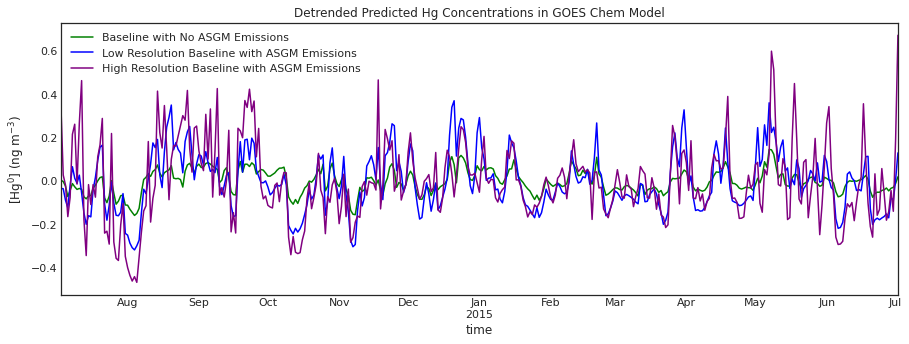

In [ ]:
plt.figure(figsize=(15,5))
plt.title('Detrended Predicted Hg Concentrations in GOES Chem Model')
get_detrended_model(GCno_asgm).SpeciesConc_Hg0.plot(color = 'green',label = 'Baseline with No ASGM Emissions ')
get_detrended_model(GC_asgm).SpeciesConc_Hg0.plot(color = 'blue',label = 'Low Resolution Baseline with ASGM Emissions ')
get_detrended_model(GC_asgmHiRes).SpeciesConc_Hg0.plot(color = 'purple',label = 'High Resolution Baseline with ASGM Emissions ')
#get_detrended_obs().value.plot(color = 'red',label = 'Observations')
plt.legend()
plt.ylabel('[Hg$^0$] (ng m$^{-3}$)')
plt.show()

# Sensitivity of Hg Concentration at CHC to changes in individual grid box

In [ ]:
def initEmcee(RefSiteNum):
    #RefSiteNum = RefSiteNum
    regions = ['spun','npun','mdd','aqp','apr']
    ConstantTerm=getConst(RefSiteNum,regions)
    Spun_sigs=multiSiteSignal('spun',RefSiteNum).to_numpy()
    Npun_sigs = multiSiteSignal('npun',RefSiteNum).to_numpy()
    Mdd_sigs =multiSiteSignal('mdd',RefSiteNum).to_numpy()
    Aqp_sigs = multiSiteSignal('aqp',RefSiteNum).to_numpy()
    Apr_sigs =multiSiteSignal('apr',RefSiteNum).to_numpy()
    return ConstantTerm,Spun_sigs,Npun_sigs,Mdd_sigs,Aqp_sigs,Apr_sigs

In [ ]:
 def model(theta):
    """Dummy model used here for Bayesian analysis (replace with actual GEOS-Chem function):
        Model: Y = f(theta) where theta is a set of parameters:
            Emissions: E1, E2, and E3
    """
    Espun, Enpun, Emdd, Eaqp, Eapr=theta

    modified=ConstantTerm+ (Espun*Spun_sigs) + (Enpun*Npun_sigs) + (Emdd*Mdd_sigs) +(Eaqp*Aqp_sigs) +Eapr*Apr_sigs 

    summary =pd.DataFrame(modified)
    model_out = summary

    return model_out

In [ ]:
ConstantTerm,Spun_sigs,Npun_sigs,Mdd_sigs,Aqp_sigs,Apr_sigs=initEmcee(0)
initial = np.array([7.75, 11.66, 54, 23.86, 10])

In [ ]:
model_df=getLoRes()

In [ ]:
model_df['Modified']=model(initial)[0].values
model_df.index = pd.to_datetime(model_df.index)
model_dfNC=model_df.loc[:'2015-7-03']
model_dfNC

,SpeciesConc_Hg0,Modified
time,,
2014-07-03,1.141870,1.168971
2014-07-04,1.142869,1.199793
2014-07-05,1.091087,1.140313
2014-07-06,1.058690,1.105796
2014-07-07,1.162876,1.258400
...,...,...
2015-06-28,0.955920,0.962364
2015-06-29,1.050984,1.064470
2015-06-30,1.038522,1.061898


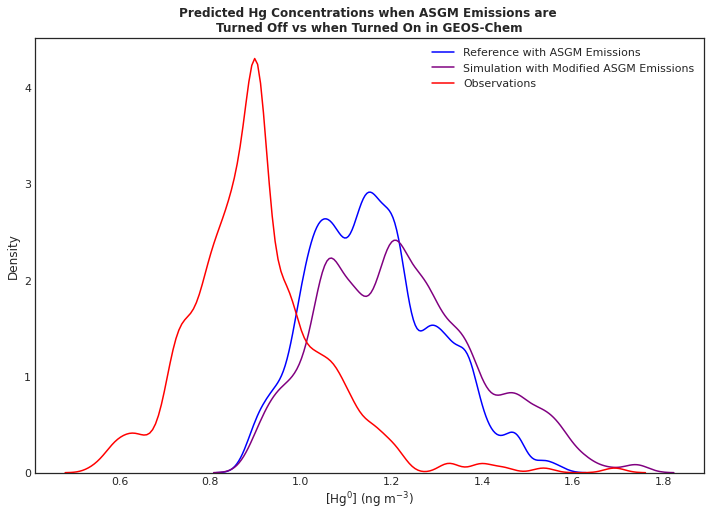

In [ ]:

plt.figure(figsize=(12,8))
plt.title('Predicted Hg Concentrations when ASGM Emissions are \nTurned Off vs when Turned On in GEOS-Chem',size=12,fontweight="bold")
sns.kdeplot(data=model_dfNC.SpeciesConc_Hg0, fill=False,color = 'blue',label = 'Reference with ASGM Emissions ',bw_adjust=0.5)
sns.kdeplot(data=model_dfNC.Modified, fill=False,color = 'purple',label = 'Simulation with Modified ASGM Emissions',bw_adjust=0.5)
sns.kdeplot(data=obsNC.value, fill=False,color = 'red',label = 'Observations',bw_adjust=0.5)
plt.legend(loc='best')
plt.xlabel('[Hg$^0$] (ng m$^{-3}$)')
plt.show()

In [ ]:
modified=pd.DataFrame(model_dfNC.Modified)
model_df_scaled=scaler.fit_transform(modified)

NameError: name 'obsNC_scaled' is not defined

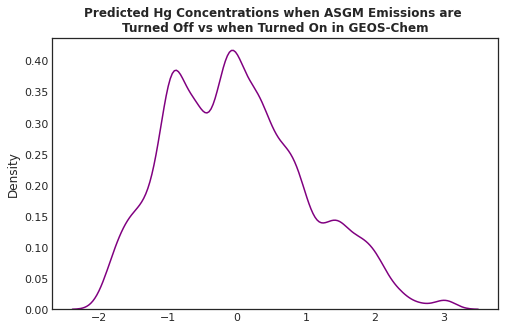

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))
#plt.figure(figsize=(8,5))
plt.title('Predicted Hg Concentrations when ASGM Emissions are \nTurned Off vs when Turned On in GEOS-Chem',size=12,fontweight="bold")
sns.kdeplot(data=model_df_scaled.squeeze(),ax =ax,color = 'purple', fill=False,label ='Reference Simulation \nwith ASGM Emissions',bw_adjust=0.5)
sns.kdeplot(data=obsNC_scaled.squeeze(),ax =ax,color = 'red', fill=False,label = 'Observations',bw_adjust=0.5)
plt.legend()
plt.xlabel('[Hg$^0$] (ng m$^{-3}$)')
plt.show()